In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('../bin/data.csv')

df.head(10)

provincia                        marca_modelo   fecha_matriculacion  \
0     Vizcaya        Detalles PORSCHE 911 (2020)   Matriculado: 05/2020   
1     Vizcaya   Detalles PORSCHE Panamera (2024)   Matriculado: 06/2024   
2     Sevilla      Detalles DACIA Sandero (2017)   Matriculado: 12/2017   
3   Barcelona   Detalles VOLKSWAGEN T-Roc (2024)   Matriculado: 01/2024   
4      Málaga         Detalles CITROEN C3 (2020)   Matriculado: 10/2020   
5  Pontevedra        Detalles SKODA Kamiq (2023)   Matriculado: 05/2023   
6  Pontevedra        Detalles PEUGEOT 208 (2020)   Matriculado: 02/2020   
7  Pontevedra        Detalles SKODA Karoq (2022)   Matriculado: 05/2022   
8      Málaga         Detalles CITROEN C3 (2018)   Matriculado: 02/2018   
9   La Coruña  Detalles VOLKSWAGEN Passat (2016)   Matriculado: 04/2016   

   kilometraje                   nombre_vendedor tipo_vendedor  \
0        21500             CENTRO PORSCHE BILBAO   Profesional   
1        10000             CENTRO PORSCHE BILBAO   Profesional   
2       124000                          DURMOVIL   Profesional   
3           10              Volkswagen Vilamòbil   Profesional   
4        60000                          MARBESOL   Profesional   
5        23161  SUZUKI SKODA MOURENTE Pontevedra   Profesional   
6        15332         CENTRO OCASIÓN PONTEVEDRA   Profesional   
7        24127  SUZUKI SKODA MOURENTE Pontevedra   Profesional   
8       143000                          DL MOTOR   Profesional   
9       120000                 CORUÑA AUTOMOCION   Profesional   

  distintivo_ambiental  garantia    precio_contado   precio_nuevo  \
0                    C  12 meses  135100 135700 0%         158158   
1          0 EMISIONES  24 meses            205700         204516   
2                    C  12 meses              9499           9696   
3                    C  24 meses             33900  no disponible   
4                    C  12 meses             11190          15700   
5                    C        Sí             19990          26783   
6          0 EMISIONES  12 meses             18900          35470   
7        no disponible        Sí             24990  no disponible   
8                    C  12 meses              8999          15700   
9                    C        No             17900          34101   

           largo          ancho          alto  \
0  4519 mm Largo  1852 mm Ancho  1297 mm Alto   
1  5054 mm Largo  1937 mm Ancho  1421 mm Alto   
2  4069 mm Largo  1733 mm Ancho  1519 mm Alto   
3            NaN            NaN           NaN   
4  3996 mm Largo  1749 mm Ancho  1474 mm Alto   
5  4241 mm Largo  1793 mm Ancho  1553 mm Alto   
6  4055 mm Largo  1745 mm Ancho  1430 mm Alto   
7            NaN            NaN           NaN   
8  3996 mm Largo  1749 mm Ancho  1474 mm Alto   
9  4767 mm Largo  1832 mm Ancho  1477 mm Alto   

                    capacidad_maletero              carroceria  \
0      Capacidad del maletero (l)132/0   CarroceríaConvertible   
1  Capacidad del maletero (l)421/1.255       CarroceríaBerlina   
2      Capacidad del maletero (l)320/0       CarroceríaBerlina   
3                                  NaN       4x4, SUV o pickup   
4      Capacidad del maletero (l)300/0       CarroceríaBerlina   
5  Capacidad del maletero (l)400/1.395  CarroceríaTodo Terreno   
6      Capacidad del maletero (l)309/0       CarroceríaBerlina   
7                                  NaN       4x4, SUV o pickup   
8      Capacidad del maletero (l)300/0       CarroceríaBerlina   
9  Capacidad del maletero (l)650/1.780  CarroceríaStationwagon   

          num_plazas                batalla  \
0  Número de plazas4  Batalla (mm)\r\n2.450   
1  Número de plazas4  Batalla (mm)\r\n2.950   
2  Número de plazas5  Batalla (mm)\r\n2.589   
3                NaN                    NaN   
4  Número de plazas5  Batalla (mm)\r\n2.539   
5  Número de plazas5  Batalla (mm)\r\n2.651   
6  Número de plazas5  Batalla (mm)\r\n2.540   
7                NaN                    NaN   
8

In [3]:
df.columns

Index(['provincia', 'marca_modelo', 'fecha_matriculacion', 'kilometraje',
       'nombre_vendedor', 'tipo_vendedor', 'distintivo_ambiental', 'garantia',
       'precio_contado', 'precio_nuevo', 'largo', 'ancho', 'alto',
       'capacidad_maletero', 'carroceria', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'CO2', 'deposito', 'combustible', 'cilindros', 'cilindrada',
       'sobrealimentacion', 'tipo_cambio', 'traccion', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion'],
      dtype='object')

In [4]:
df['kilometraje'].dtype == 'int64'

True

In [5]:
df.shape

(80, 36)

In [6]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.00
marca_modelo             0.00
fecha_matriculacion      0.00
kilometraje              0.00
nombre_vendedor          0.00
tipo_vendedor            0.00
distintivo_ambiental     0.00
garantia                 0.00
precio_contado           0.00
precio_nuevo             0.00
largo                   20.00
ancho                   20.00
alto                    20.00
capacidad_maletero      20.00
carroceria               0.00
num_plazas              13.75
batalla                 20.00
peso                    12.50
num_puertas              0.00
consumo_medio           13.75
consumo_carretera       15.00
consumo_urbano          15.00
CO2                     21.25
deposito                20.00
combustible              0.00
cilindros               20.00
cilindrada              10.00
sobrealimentacion       20.00
tipo_cambio              0.00
traccion                20.00
num_marchas             16.25
potencia_kw             20.00
potencia_cv              0.00
par       

In [7]:
df = df.dropna(subset=['precio_contado'])

In [8]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.00
marca_modelo             0.00
fecha_matriculacion      0.00
kilometraje              0.00
nombre_vendedor          0.00
tipo_vendedor            0.00
distintivo_ambiental     0.00
garantia                 0.00
precio_contado           0.00
precio_nuevo             0.00
largo                   20.00
ancho                   20.00
alto                    20.00
capacidad_maletero      20.00
carroceria               0.00
num_plazas              13.75
batalla                 20.00
peso                    12.50
num_puertas              0.00
consumo_medio           13.75
consumo_carretera       15.00
consumo_urbano          15.00
CO2                     21.25
deposito                20.00
combustible              0.00
cilindros               20.00
cilindrada              10.00
sobrealimentacion       20.00
tipo_cambio              0.00
traccion                20.00
num_marchas             16.25
potencia_kw             20.00
potencia_cv              0.00
par       

In [9]:
df.shape

(80, 36)

In [10]:
df['fecha_matriculacion'] = df['fecha_matriculacion'].str.split("Matriculado: ").str[1]

filas_con_mes = df['fecha_matriculacion'].str.contains('/')

df.loc[filas_con_mes, "Fecha_mes"] = df.loc[filas_con_mes, 'fecha_matriculacion'].str.split('/').str[0].astype("Int64")
df.loc[filas_con_mes, "Fecha_año"] = df.loc[filas_con_mes, 'fecha_matriculacion'].str.split('/').str[1].astype("Int64")

In [11]:
df = df.drop(columns=['fecha_matriculacion'])

In [12]:
df['Fecha_año']=df['Fecha_año'].astype('int64')

In [13]:
df['Fecha_mes']=df['Fecha_mes'].astype('int64')

In [14]:
df = df[df["tipo_vendedor"] == "Profesional"]

In [15]:
df["garantia"] = df["garantia"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [16]:
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors='coerce')

In [17]:
df["precio_nuevo"] = pd.to_numeric(df["precio_nuevo"], errors='coerce')

In [18]:
df["largo"] = df["largo"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [19]:
df["ancho"] = df["ancho"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [20]:
df["alto"] = df["alto"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [21]:
df["capacidad_maletero"] = df["capacidad_maletero"].str.split(")").str[1].str.split("/").str[0].astype(float)

In [22]:
df["num_plazas"] = df["num_plazas"].str.split("s").str[1].astype(float)

In [23]:
df["batalla"] = df["batalla"].str.extract(r'(\d+\.\d+)').replace(".","").astype(float)

In [24]:
df["peso"] = df["peso"].str.extract(r'(\d+\.\d+)').replace(".","").astype(float)

In [25]:
df["num_puertas"] = df["num_puertas"].str.extract(r'(\d+)').astype(int)

In [26]:
df["consumo_medio"] = df["consumo_medio"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [27]:
df["consumo_carretera"] = df["consumo_carretera"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [28]:
df["consumo_urbano"] = df["consumo_urbano"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [29]:
df["CO2"] = df["CO2"].str.extract(r'(\d{1,3})(?= g/km)')[0].astype(float)

In [30]:
df["deposito"] = df["deposito"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)

In [31]:
df["cilindros"] = df["cilindros"].str.extract(r'(\d+)').astype(float)

In [32]:
df["cilindrada"] = df["cilindrada"].str.extract(r'(\d+,\d+|\d+\.\d+)').replace(',', '.', regex=True).astype(float)

In [33]:
df["num_marchas"] = df["num_marchas"].str.extract(r'(\d+)').astype(float)

In [34]:
df["potencia_kw"] = df["potencia_kw"].str.extract(r'(\d+)').astype(float)

In [35]:
df["potencia_cv"] = df["potencia_cv"].str.extract(r'(\d+)').astype(float)

In [36]:
df["par"] = df["par"].str.extract(r'(\d+)').astype(float)

In [37]:
df["velocidad_max"] = df["velocidad_max"].str.extract(r'(\d+)').astype(float)

In [38]:
df["aceleracion"] = df["aceleracion"].str.extract(r'(\d+,\d+|\d+\.\d+)')[0].str.replace(",", ".").astype(float)

In [39]:
df.head()

provincia                       marca_modelo  kilometraje  \
0    Vizcaya       Detalles PORSCHE 911 (2020)         21500   
1    Vizcaya  Detalles PORSCHE Panamera (2024)         10000   
2    Sevilla     Detalles DACIA Sandero (2017)        124000   
3  Barcelona  Detalles VOLKSWAGEN T-Roc (2024)            10   
4     Málaga        Detalles CITROEN C3 (2020)         60000   

         nombre_vendedor tipo_vendedor distintivo_ambiental  garantia  \
0  CENTRO PORSCHE BILBAO   Profesional                    C      12.0   
1  CENTRO PORSCHE BILBAO   Profesional          0 EMISIONES      24.0   
2               DURMOVIL   Profesional                    C      12.0   
3   Volkswagen Vilamòbil   Profesional                    C      24.0   
4               MARBESOL   Profesional                    C      12.0   

   precio_contado  precio_nuevo   largo   ancho    alto  capacidad_maletero  \
0             NaN      158158.0  4519.0  1852.0  1297.0               132.0   
1        205700.0      204516.0  5054.0  1937.0  1421.0               421.0   
2          9499.0        9696.0  4069.0  1733.0  1519.0               320.0   
3         33900.0           NaN     NaN     NaN     NaN                 NaN   
4         11190.0       15700.0  3996.0  1749.0  1474.0               300.0   

              carroceria  num_plazas  batalla   peso  num_puertas  \
0  CarroceríaConvertible         4.0    2.450  2.015            2   
1      CarroceríaBerlina         4.0    2.950  2.830            5   
2      CarroceríaBerlina         5.0    2.589  1.652            5   
3      4x4, SUV o pickup         NaN      NaN    NaN            5   
4      CarroceríaBerlina         5.0    2.539  1.550            5   

   consumo_medio  consumo_carretera  consumo_urbano    CO2  deposito  \
0            9.6                7.6            12.9  218.0      64.0   
1            2.1                NaN             NaN   47.0      80.0   
2            3.5                3.4             3.7   90.0      50.0   
3            NaN                NaN             NaN    NaN       NaN   
4            4.7                4.1             5.7   96.0      45.0   

                                  combustible  cilindros  cilindrada  \
0                        Combustible Gasolina        6.0       2.981   
1  Combustible Gasolina y corriente eléctrica        8.0       3.996   
2                          Combustible Diesel        4.0       1.461   
3                                    Gasolina        NaN         NaN   
4                        Combustible Gasolina        3.0       1.199   

                               sobrealimentacion  \
0                  Sobrealimentación Doble turbo   
1  Sobrealimentación Turbo de geometría variable   
2                        Sobrealimentación Turbo   
3                                            NaN   
4                        Sobrealimentación Turbo   

                                 tipo_cambio  \
0  Tipo de transmisión Automática secuencial   
1  Tipo de transmisión Automática secuencial   
2                 Tipo de transmisión Manual   
3                                 Automático   
4                 Tipo de transmisión Manual   

                            traccion  num_marchas  potencia_kw  potencia_cv  \
0           TracciónTracción trasera          8.0        283.0        385.0   
1  TracciónTracción total permanente          8.0        500.0        680.0   
2         TracciónTracción delantera          5.0         55.0         75.0   
3                                NaN          NaN          NaN        150.0   
4         TracciónTracción delantera          5.0         60.0         82.0   

     par  velocidad_max  aceleracion  Fecha_mes  Fecha_año  
0  450.0          291.0          4.4          5       2020  
1  930.0          315.0          3.2          6       2024  
2  200.0          164.0         14.6         12       2017  
3    NaN            NaN          NaN          1       2024  
4  118.0          168.0         13.0     

In [40]:
df.shape

(80, 37)

In [41]:
df.dtypes

provincia                object
marca_modelo             object
kilometraje               int64
nombre_vendedor          object
tipo_vendedor            object
distintivo_ambiental     object
garantia                float64
precio_contado          float64
precio_nuevo            float64
largo                   float64
ancho                   float64
alto                    float64
capacidad_maletero      float64
carroceria               object
num_plazas              float64
batalla                 float64
peso                    float64
num_puertas               int32
consumo_medio           float64
consumo_carretera       float64
consumo_urbano          float64
CO2                     float64
deposito                float64
combustible              object
cilindros               float64
cilindrada              float64
sobrealimentacion        object
tipo_cambio              object
traccion                 object
num_marchas             float64
potencia_kw             float64
potencia

In [42]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio_contado')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio_contado'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [43]:
categorical_columns

Index(['provincia', 'marca_modelo', 'nombre_vendedor', 'tipo_vendedor',
       'distintivo_ambiental', 'carroceria', 'combustible',
       'sobrealimentacion', 'tipo_cambio', 'traccion'],
      dtype='object')

In [44]:
len(categorical_columns)

10

In [45]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'CO2', 'deposito', 'cilindros', 'cilindrada', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion',
       'Fecha_mes', 'Fecha_año'],
      dtype='object')

In [46]:
len(continuous_columns)

27

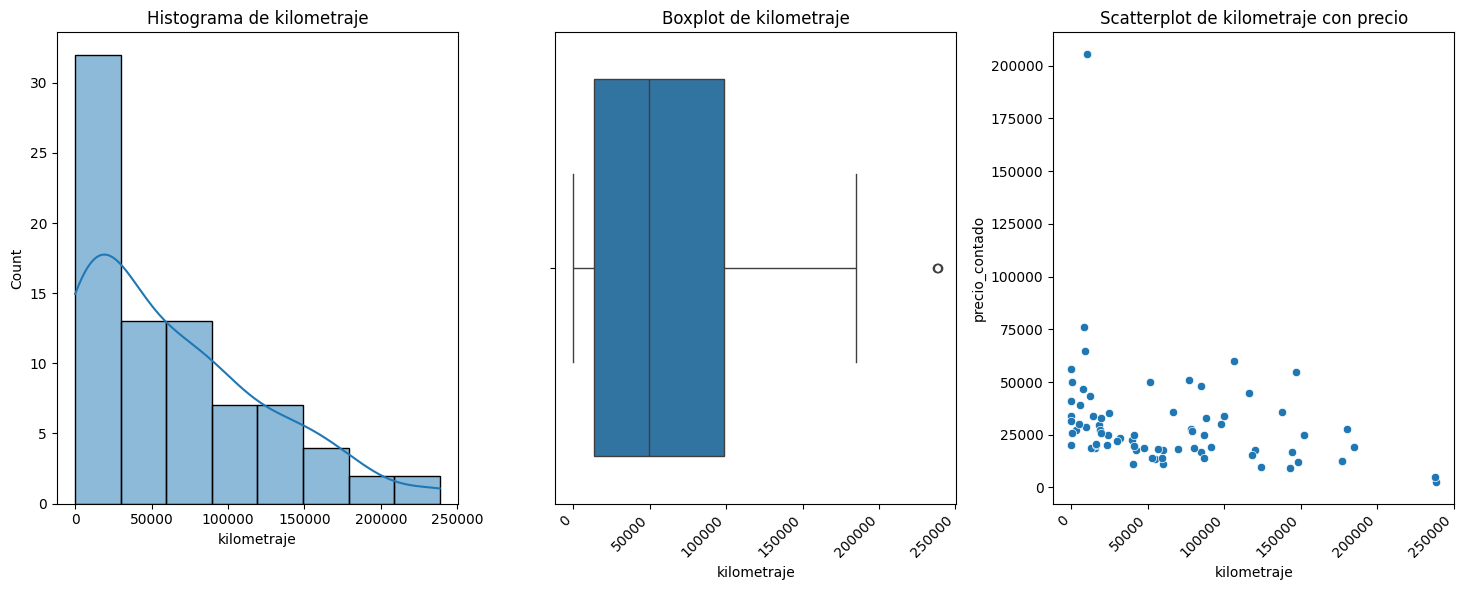

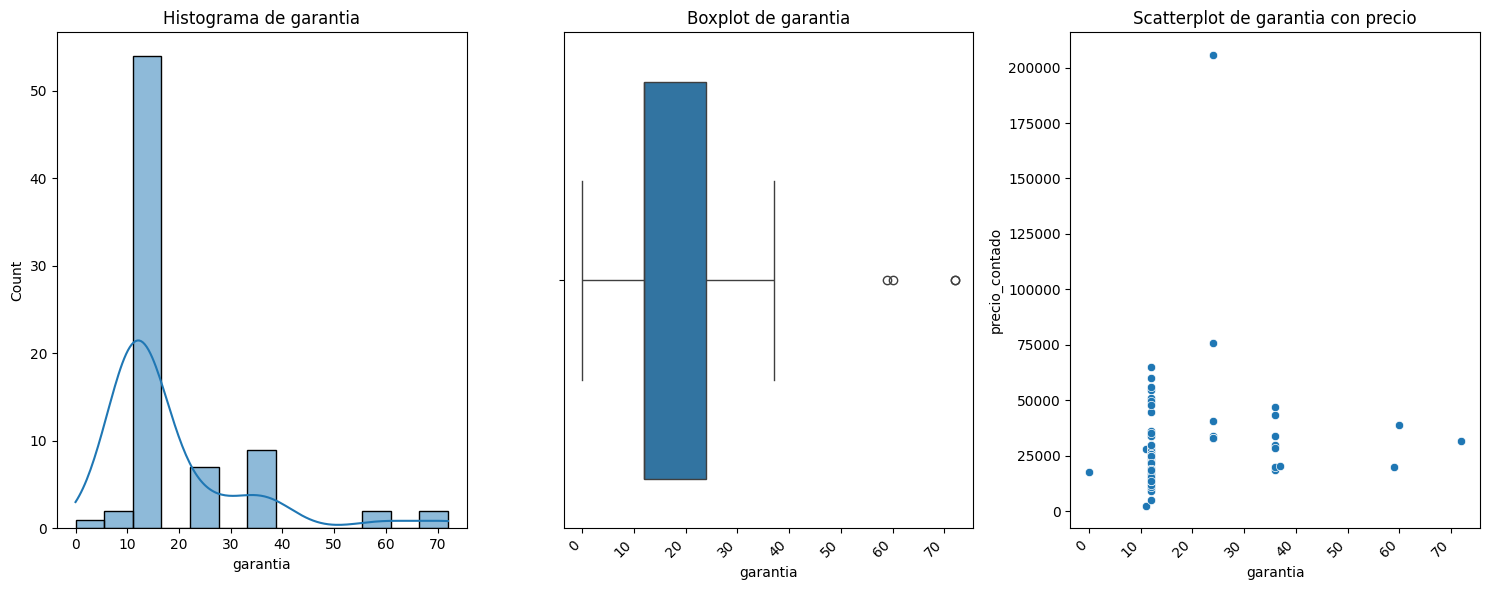

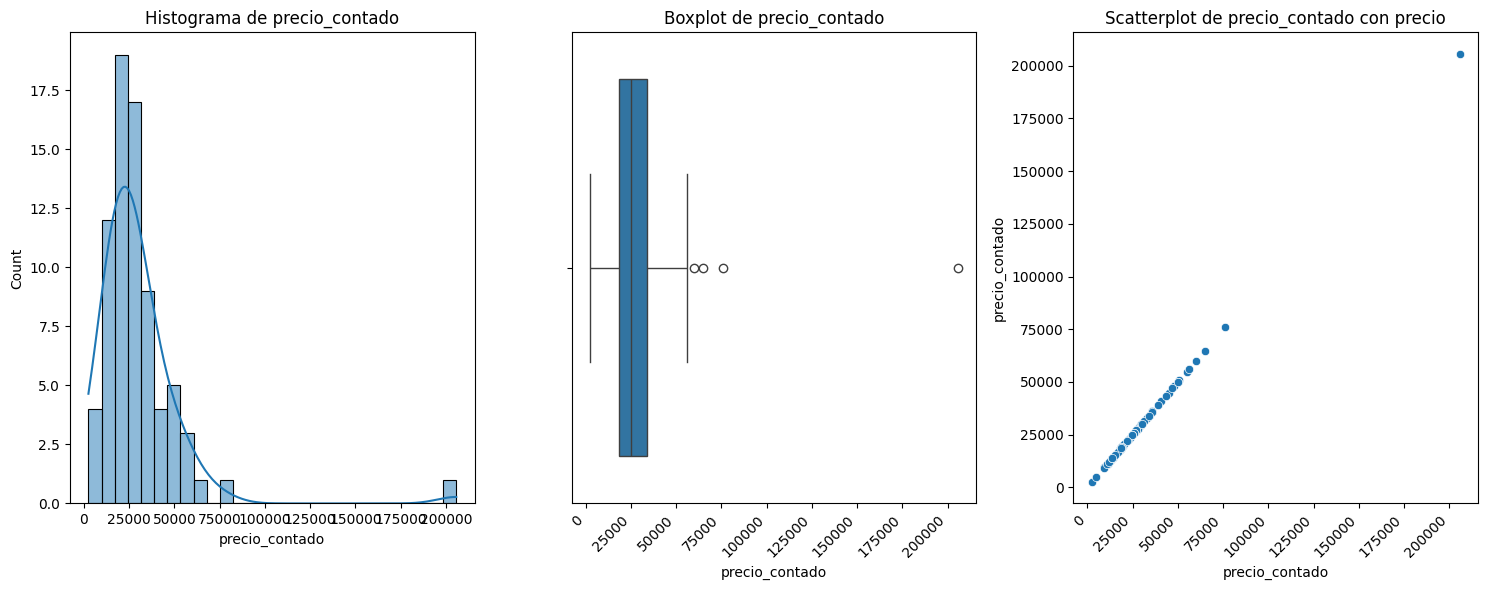

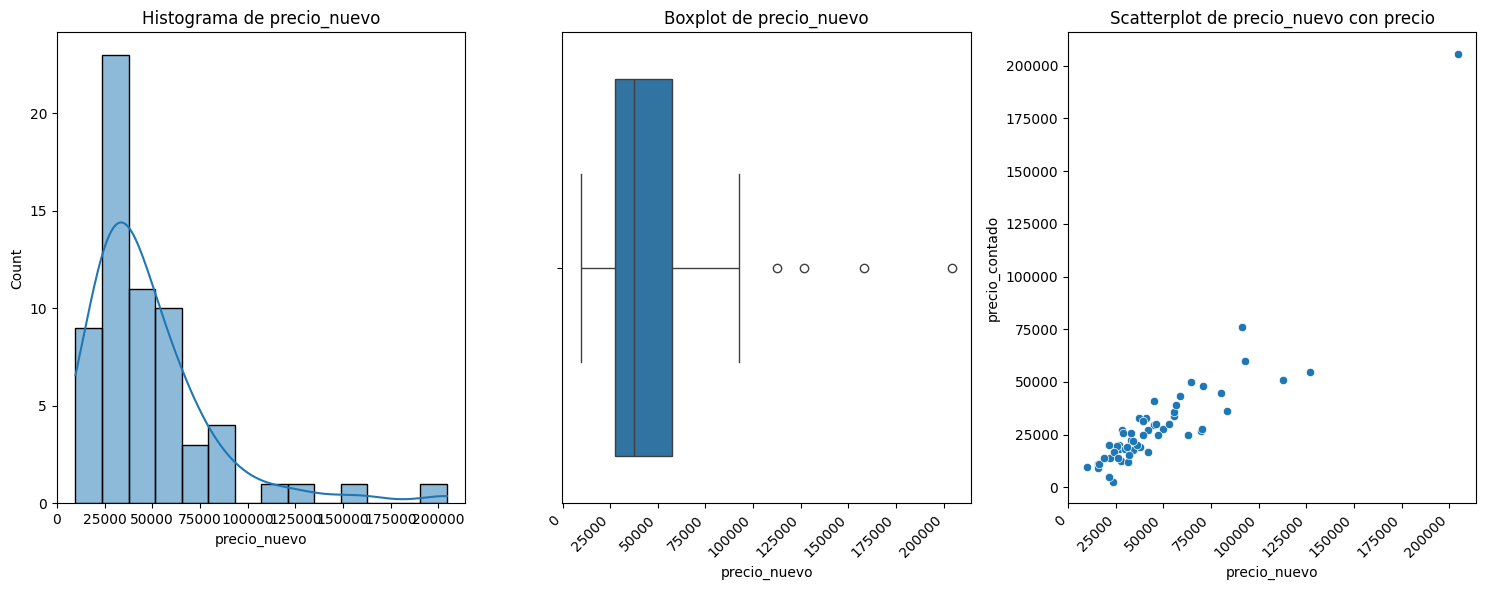

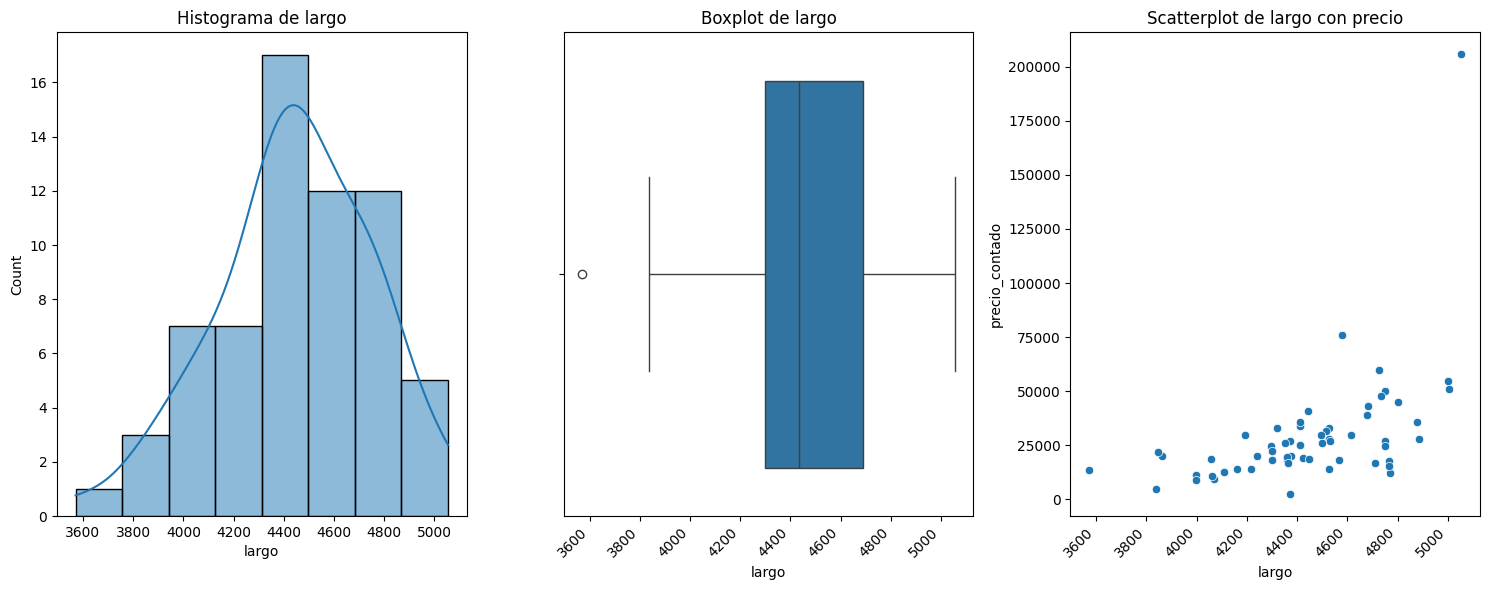

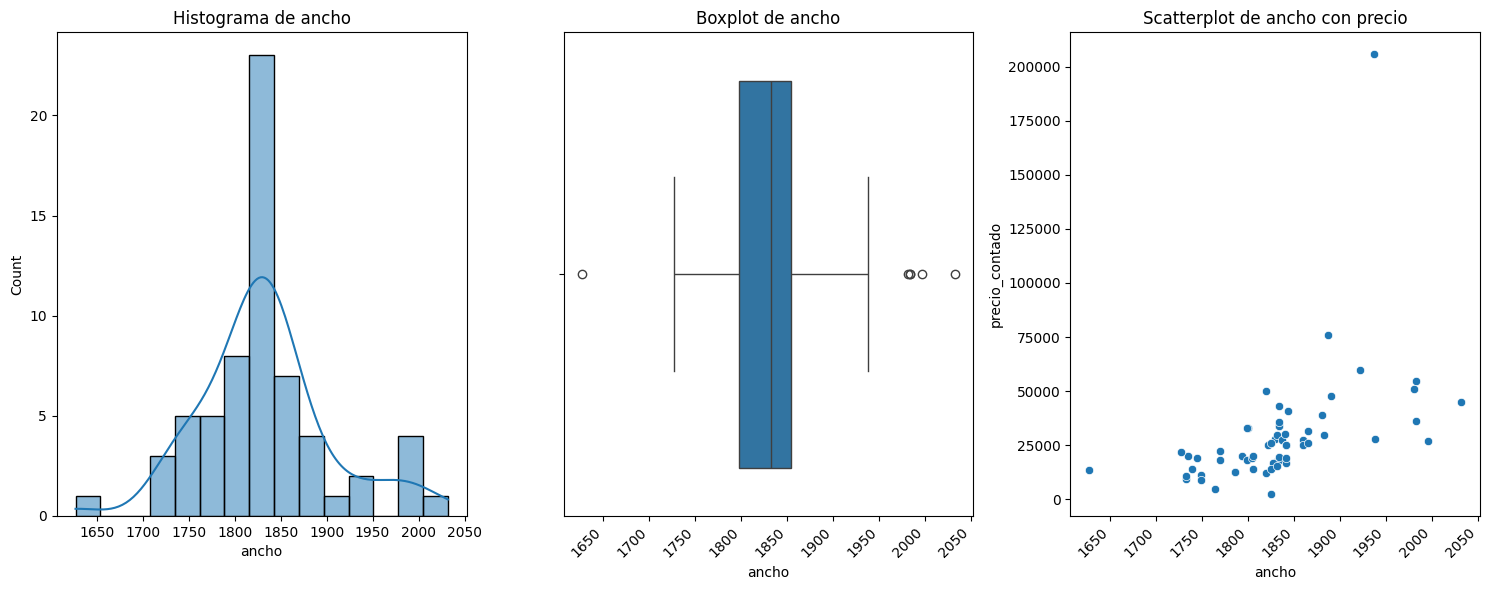

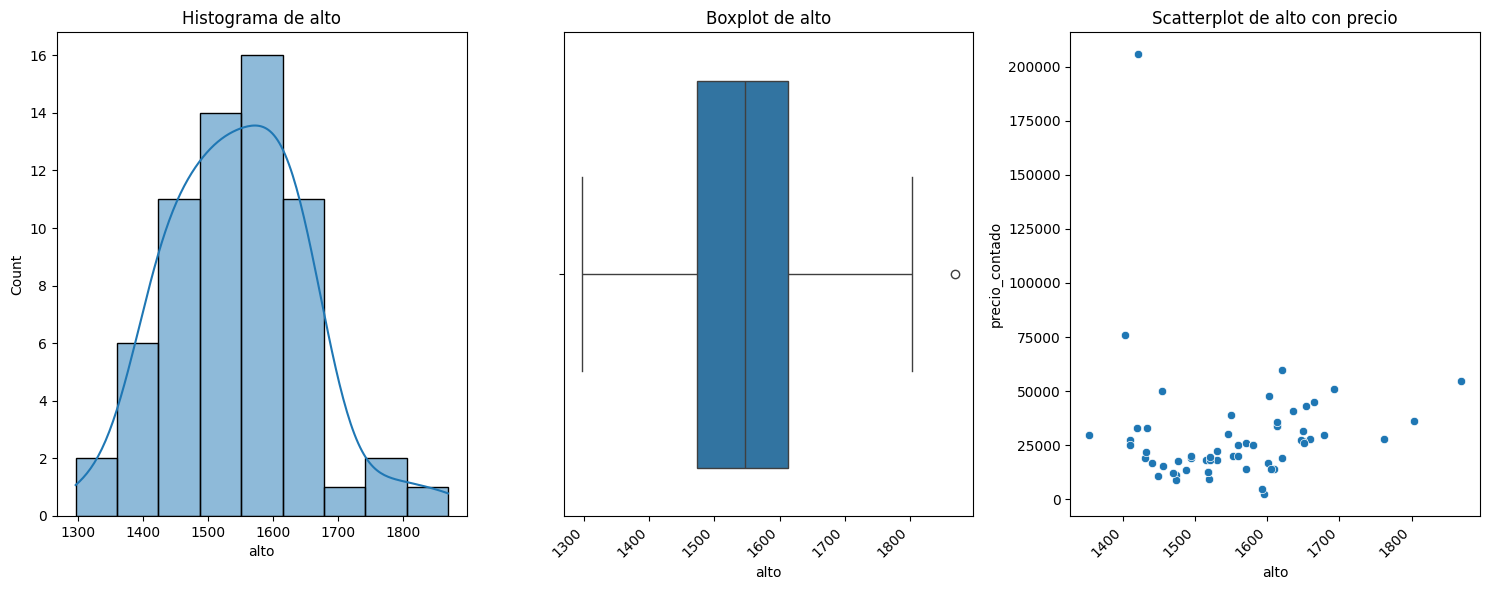

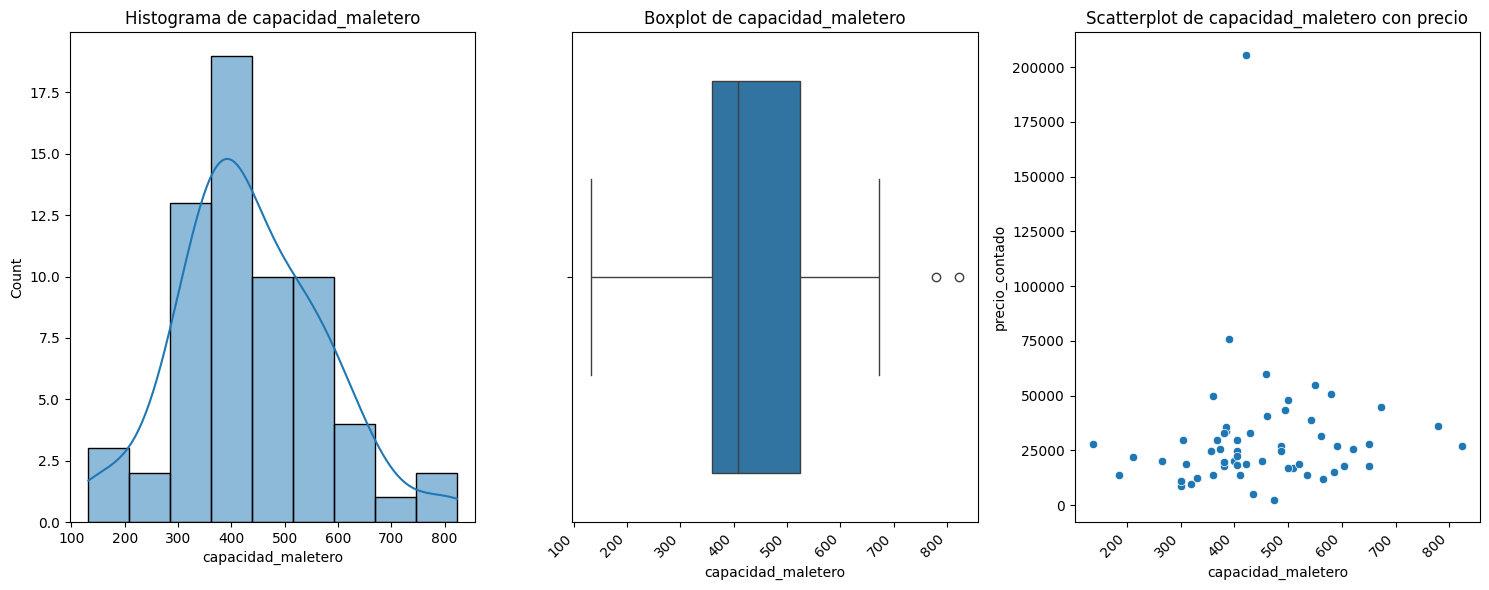

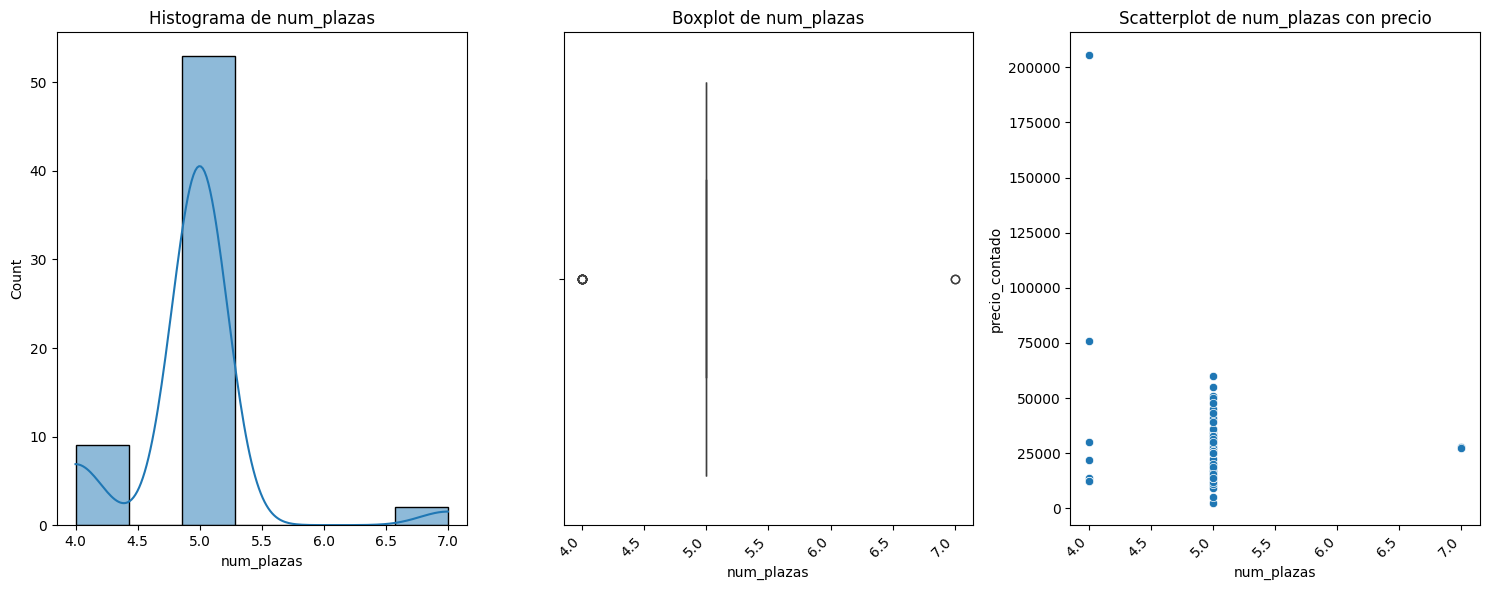

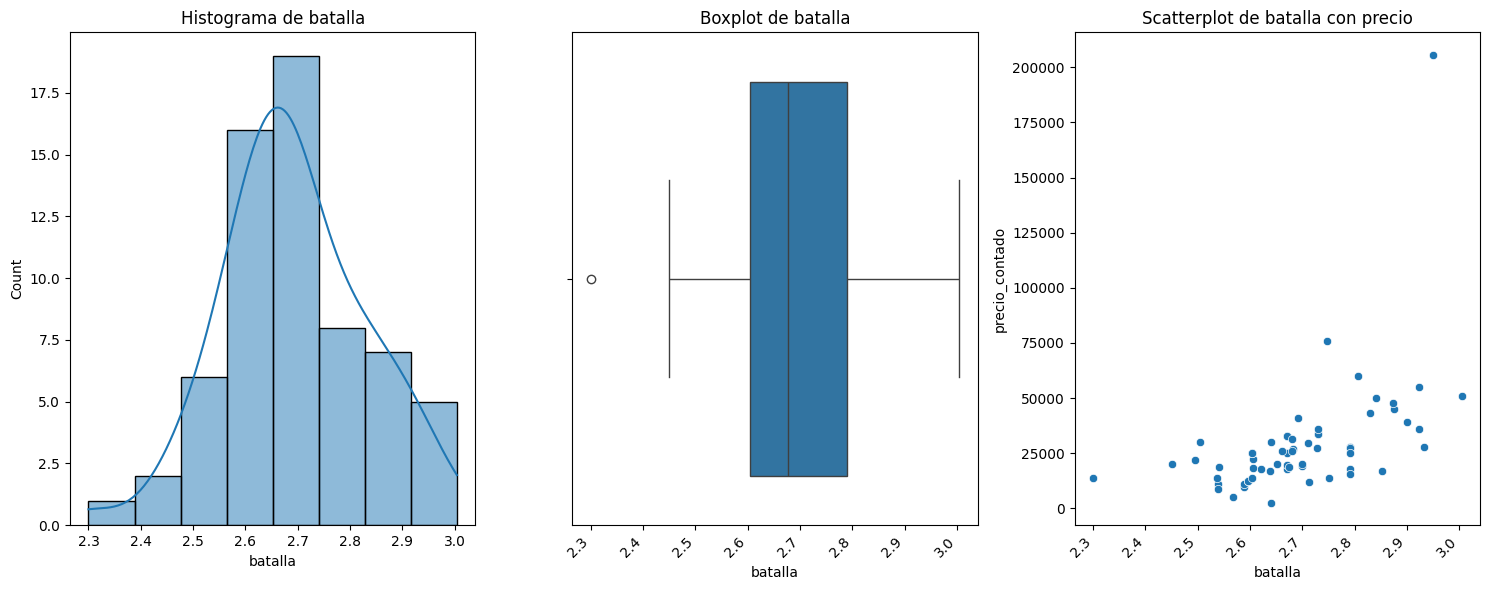

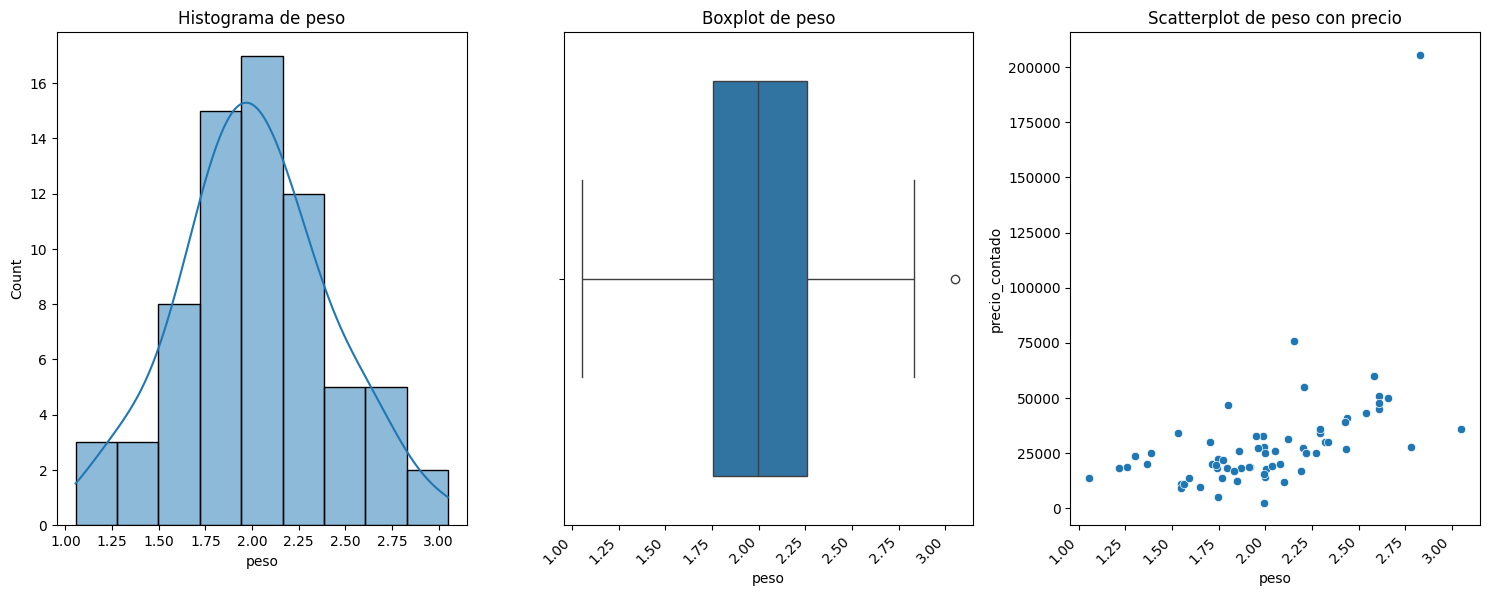

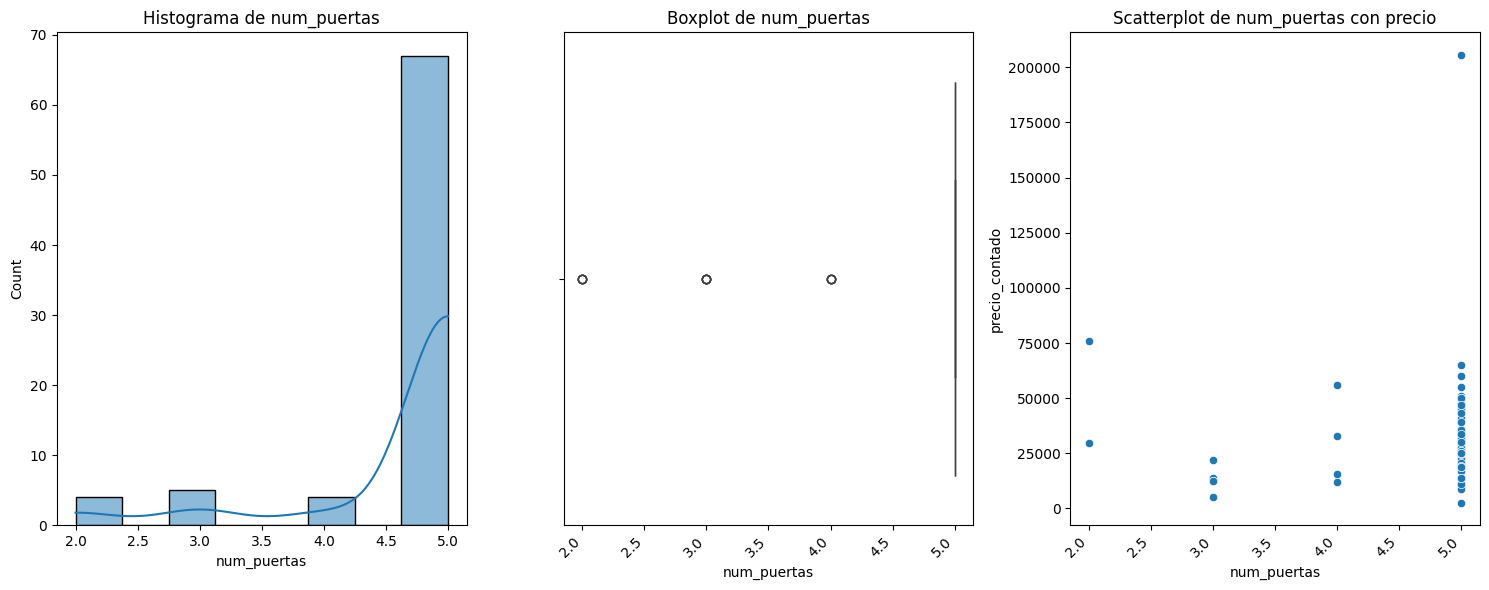

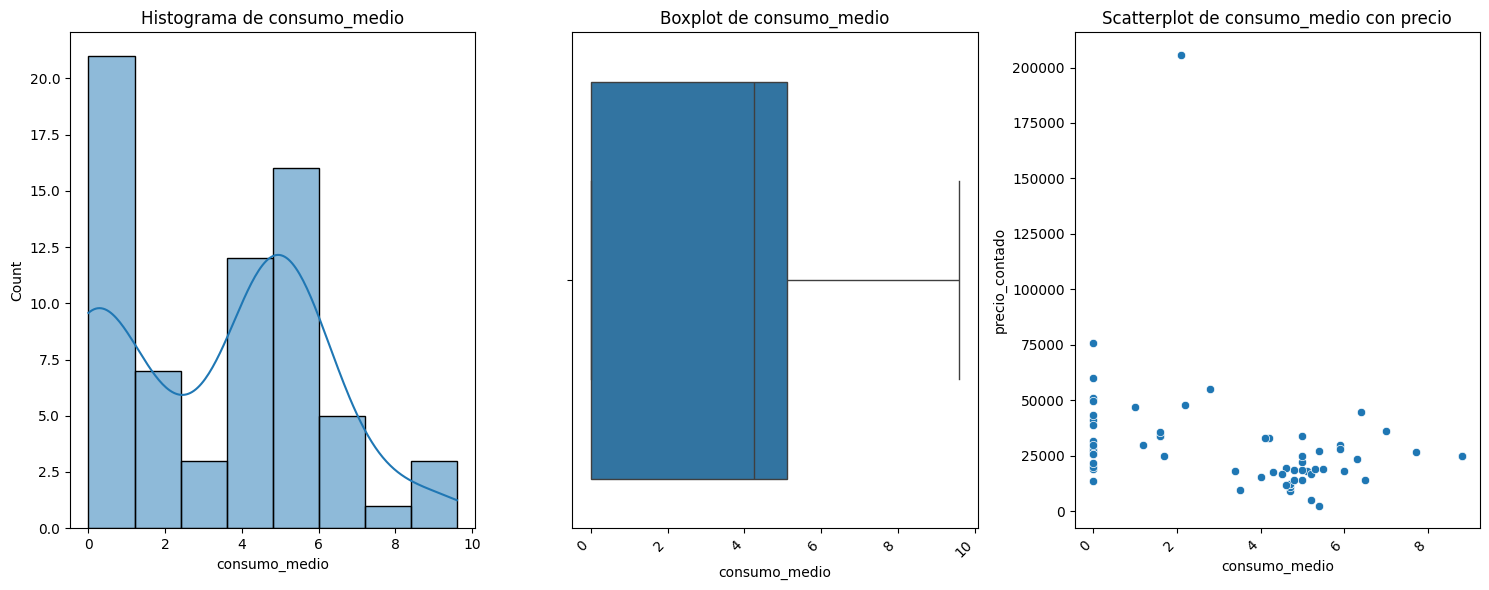

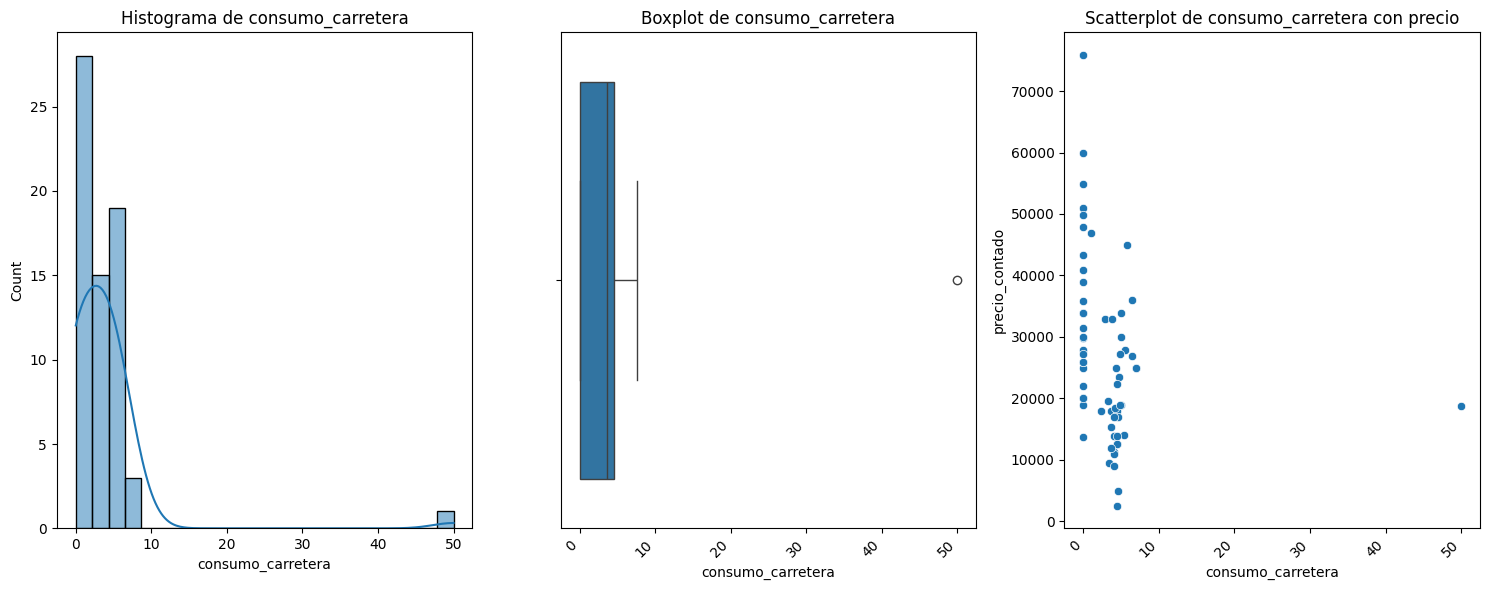

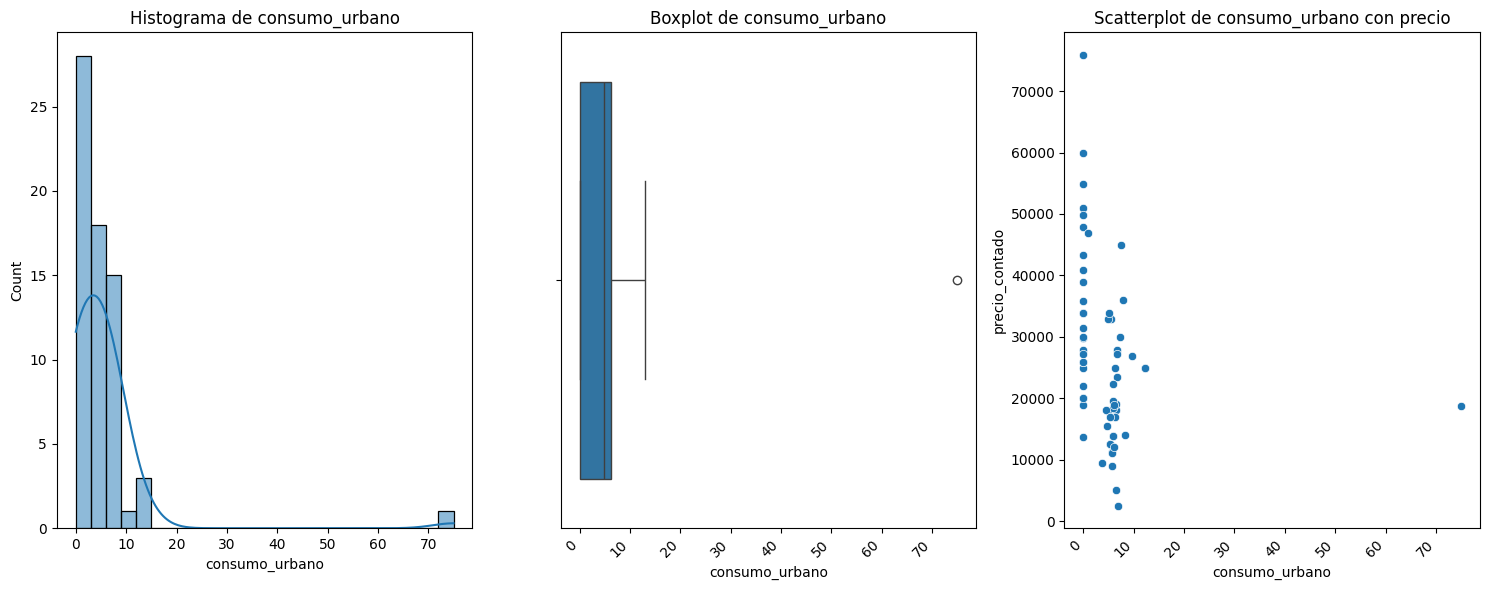

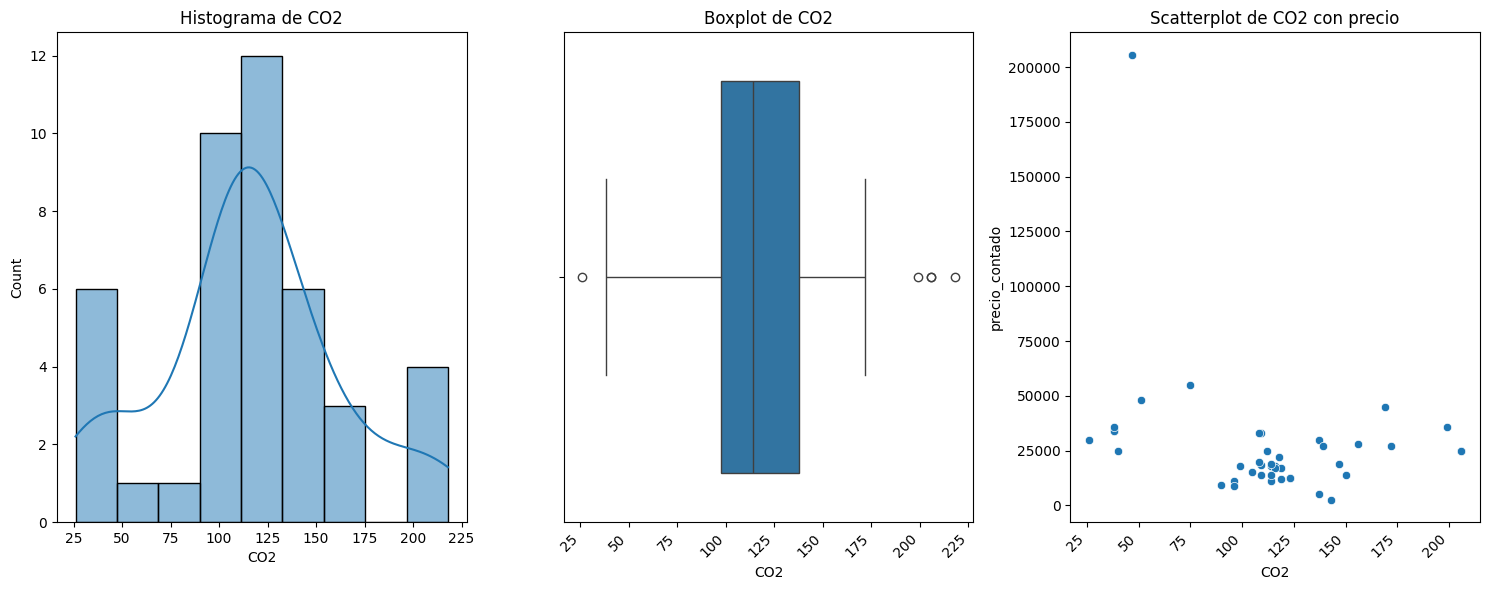

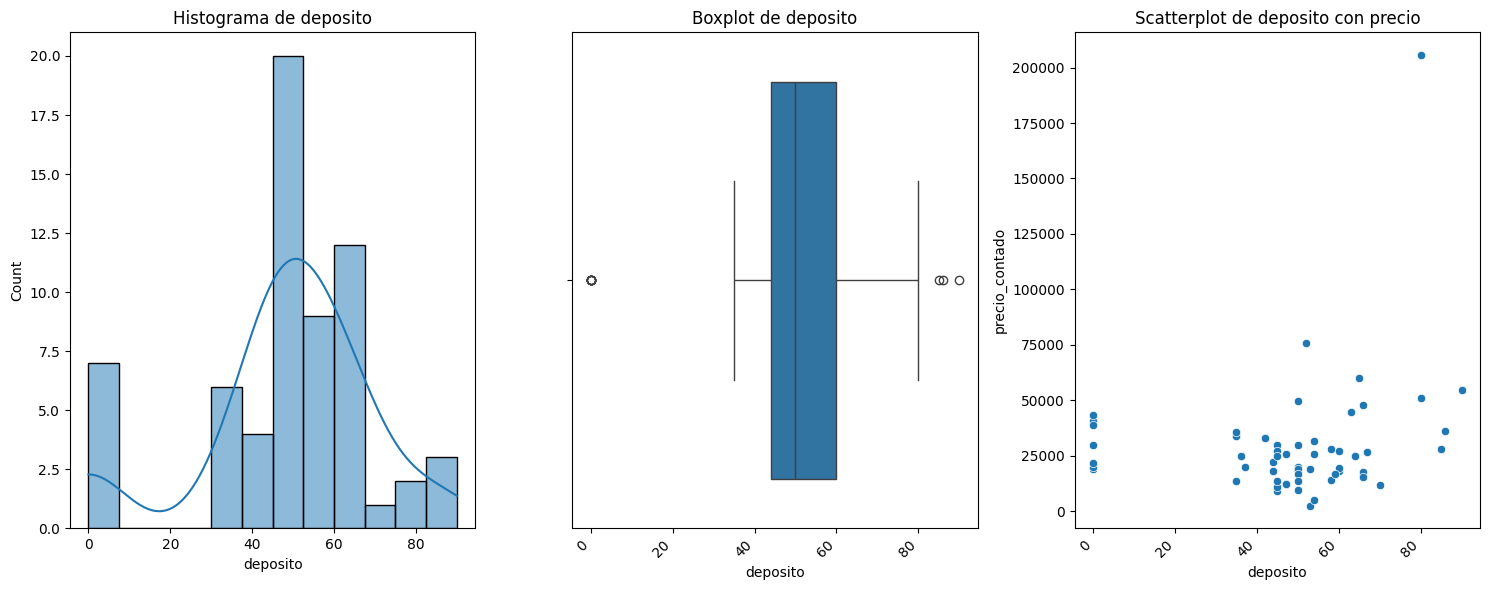

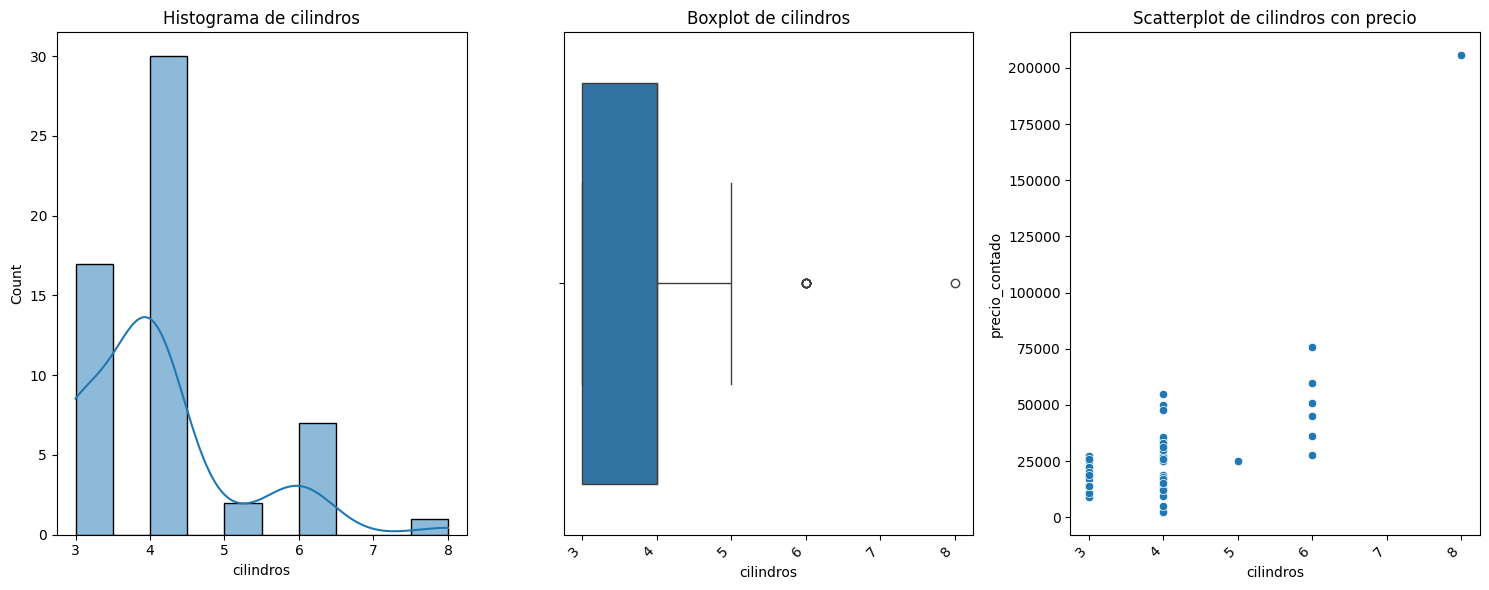

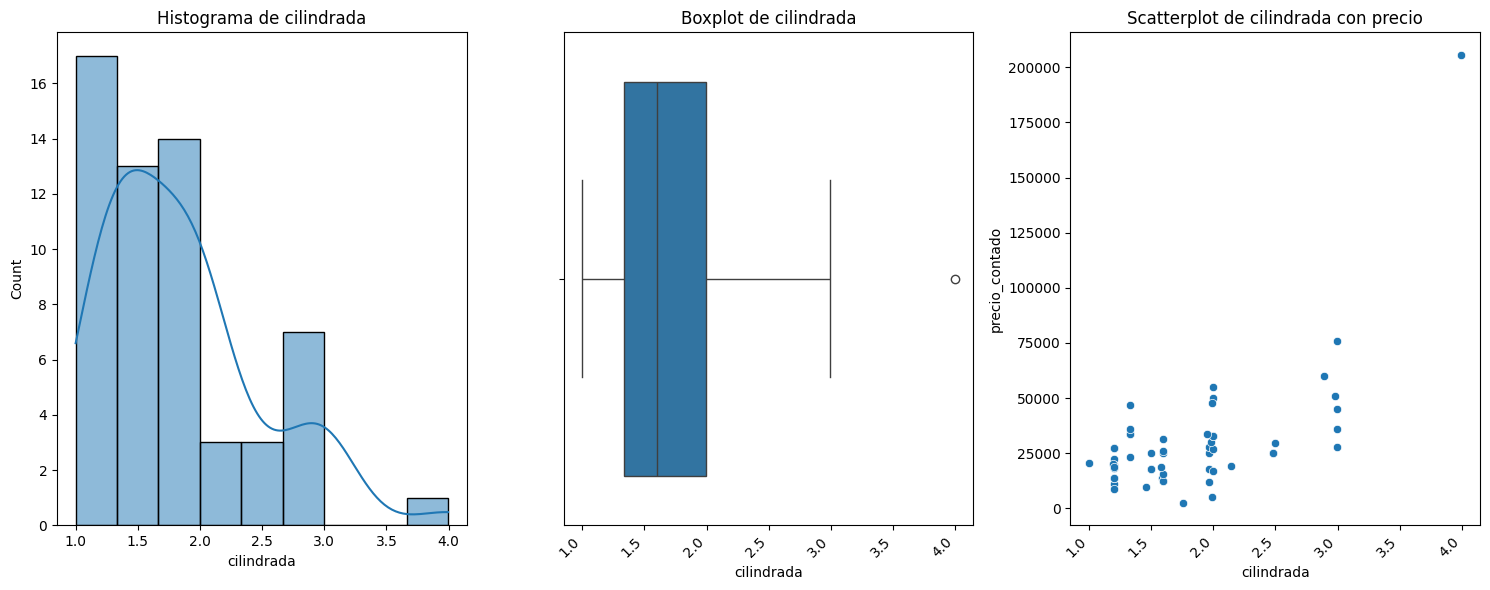

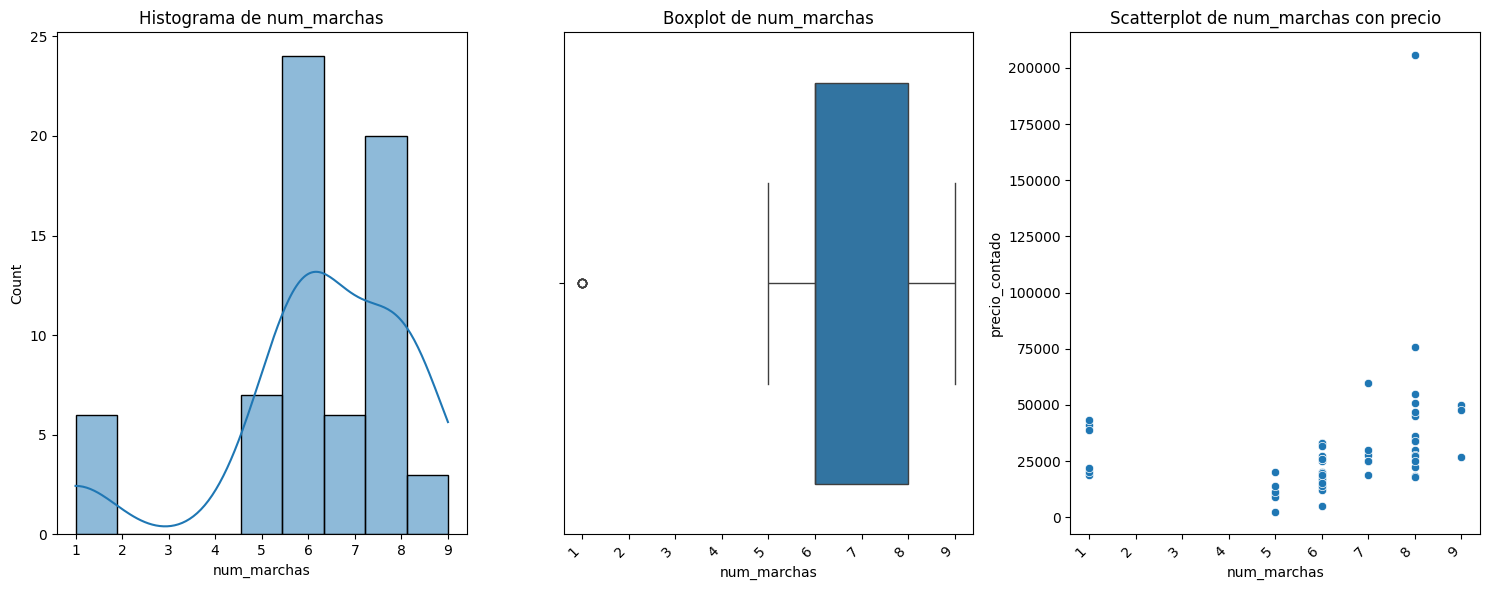

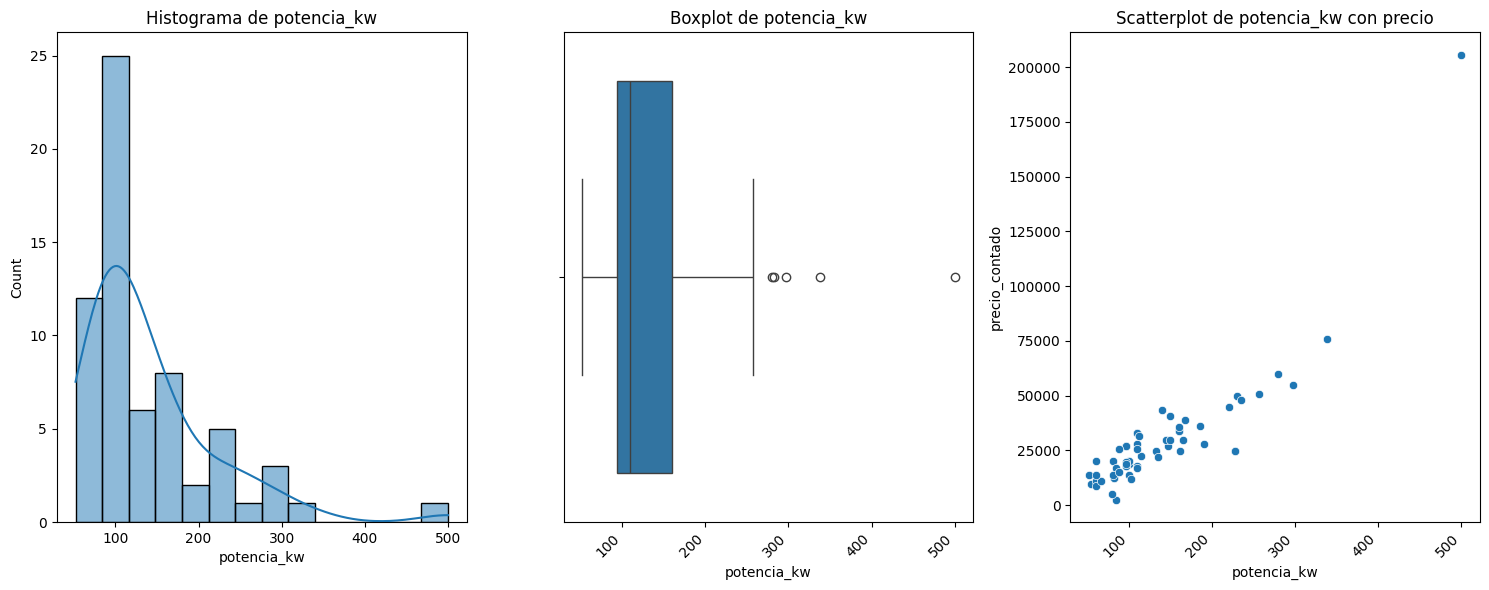

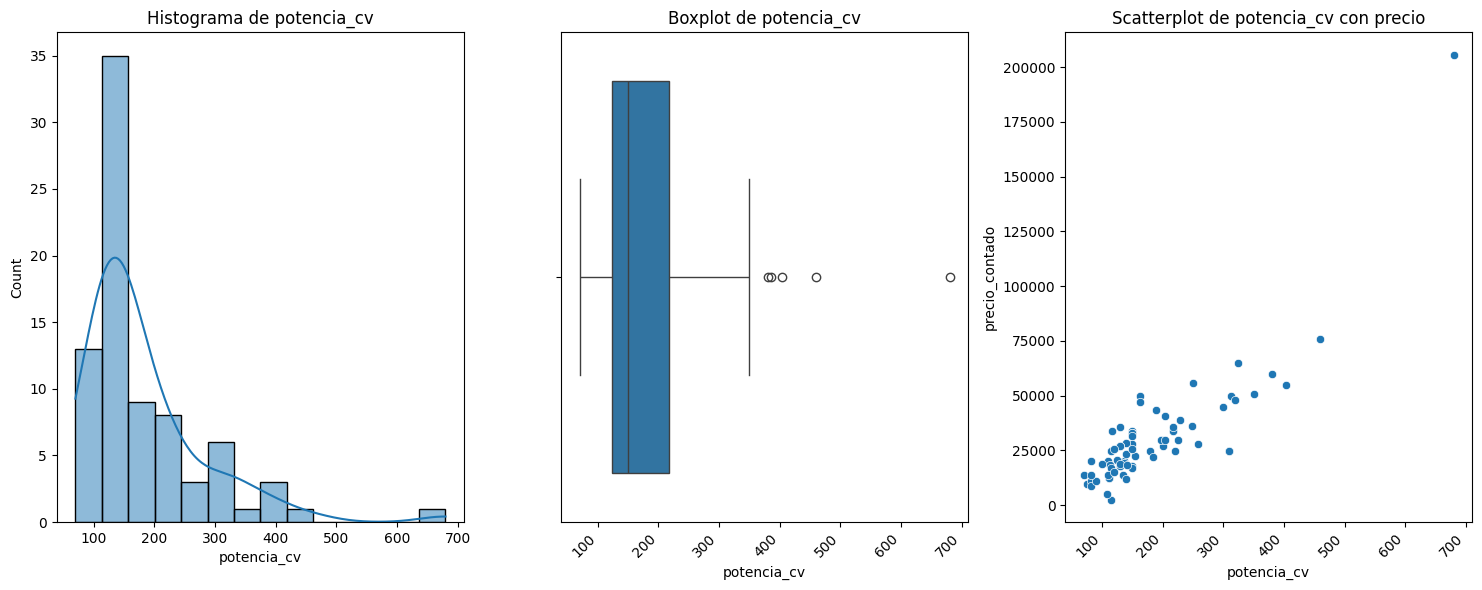

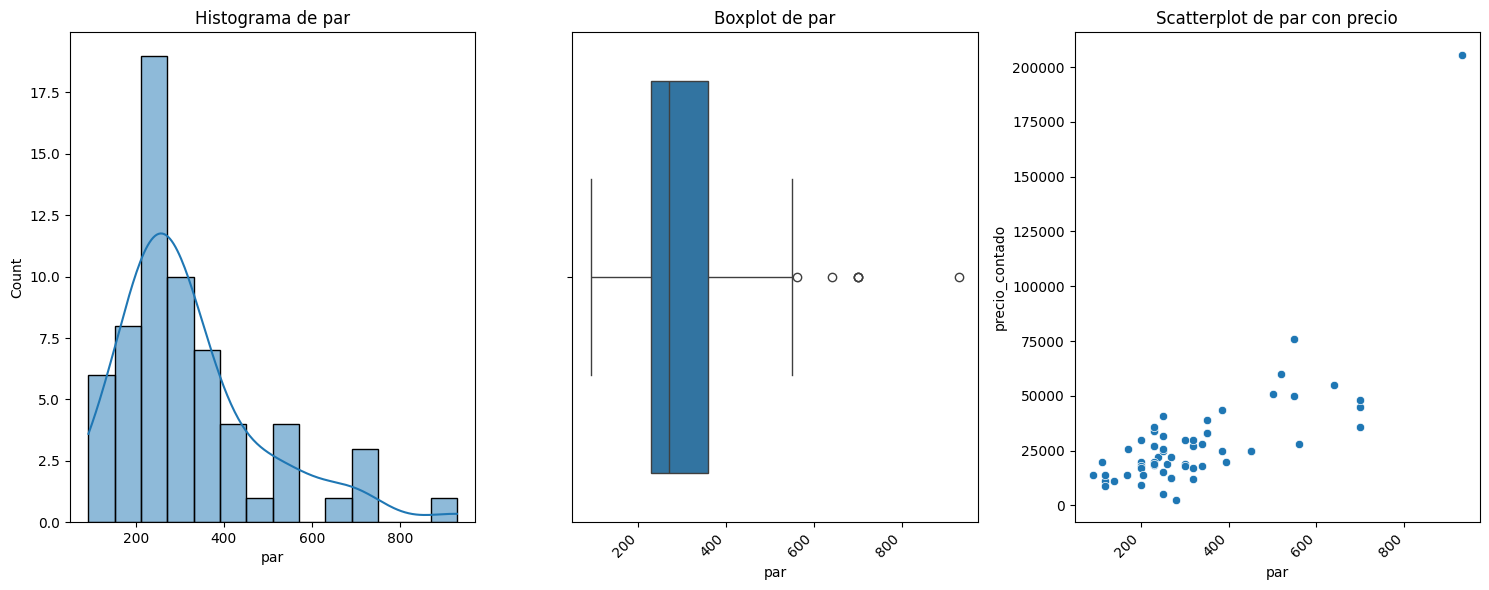

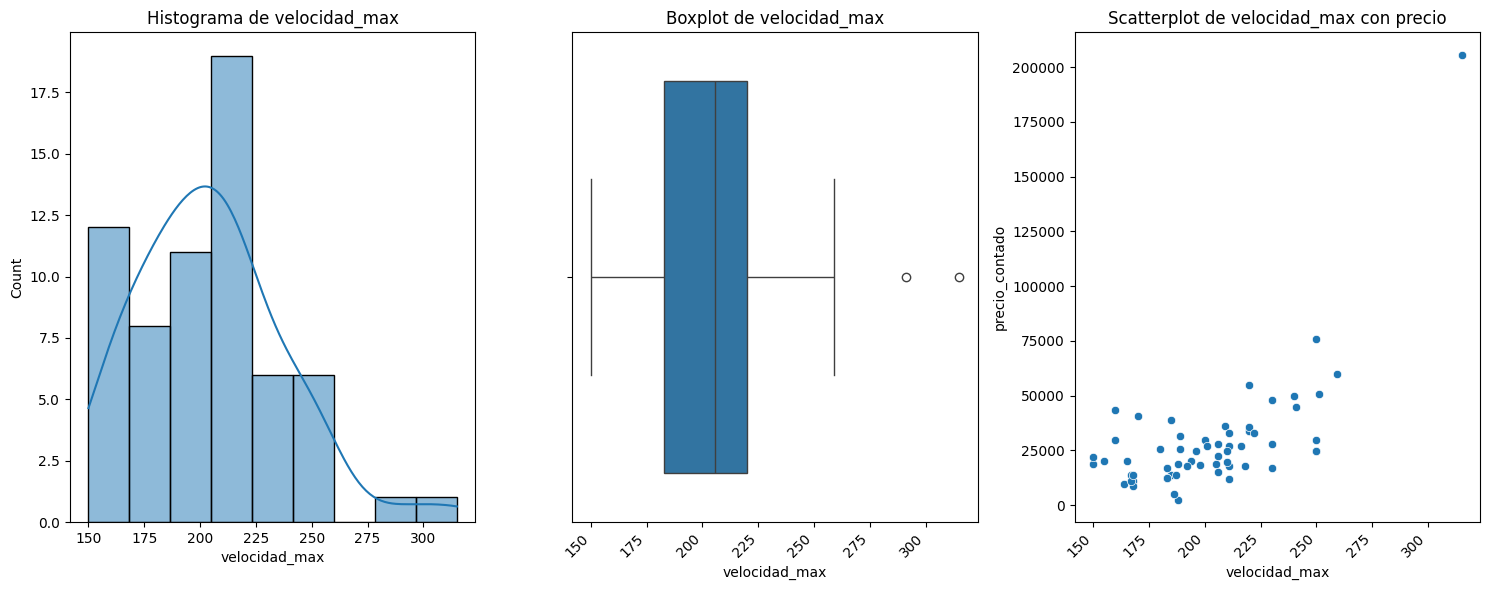

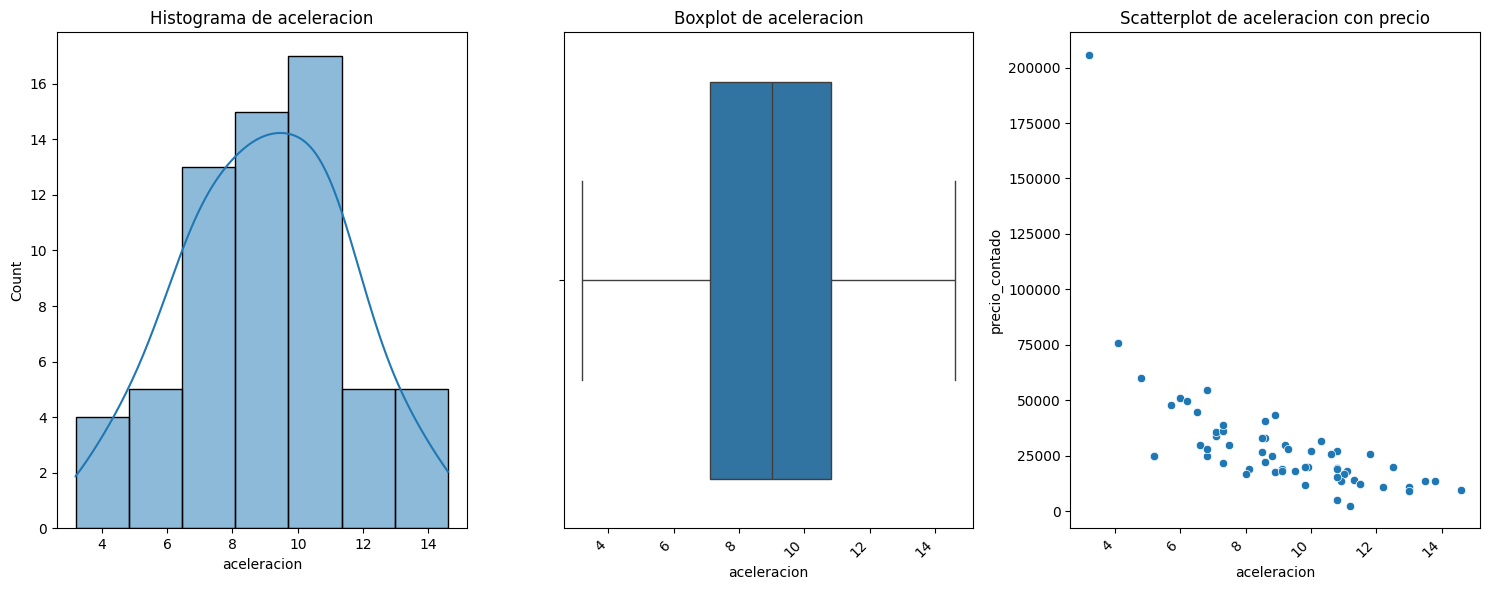

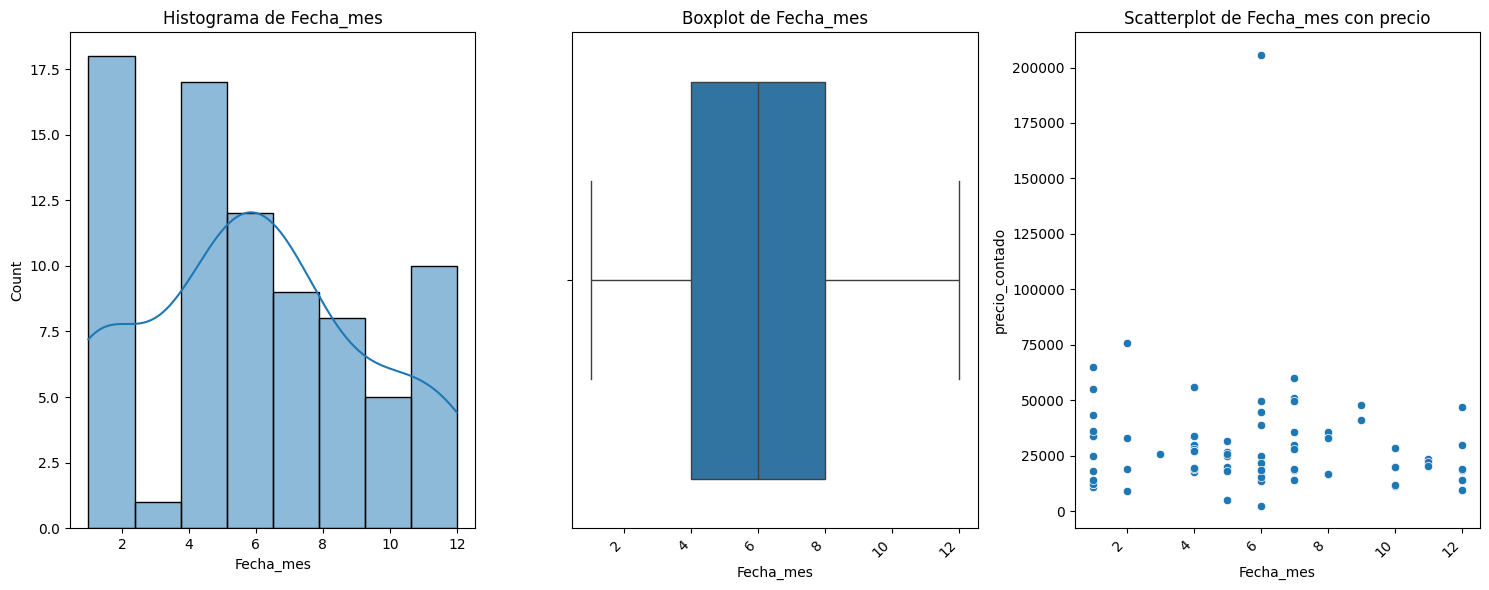

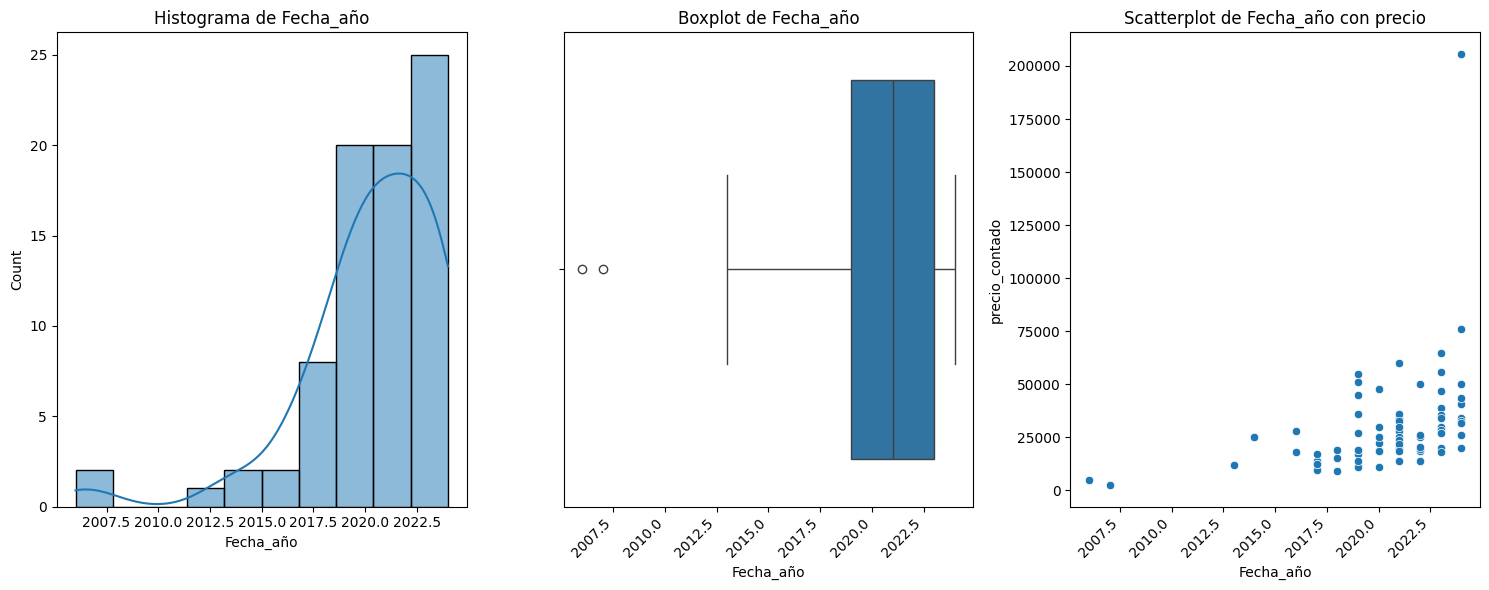

In [47]:
for columna in continuous_columns:
    metricas(df, columna)

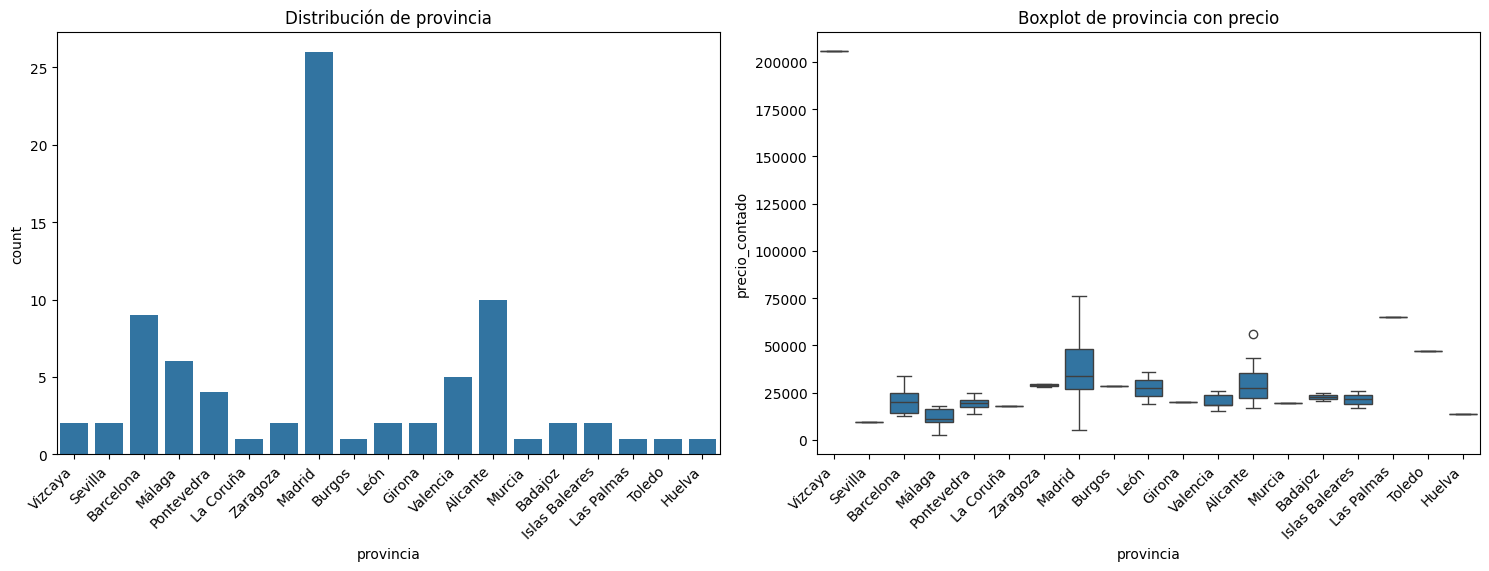

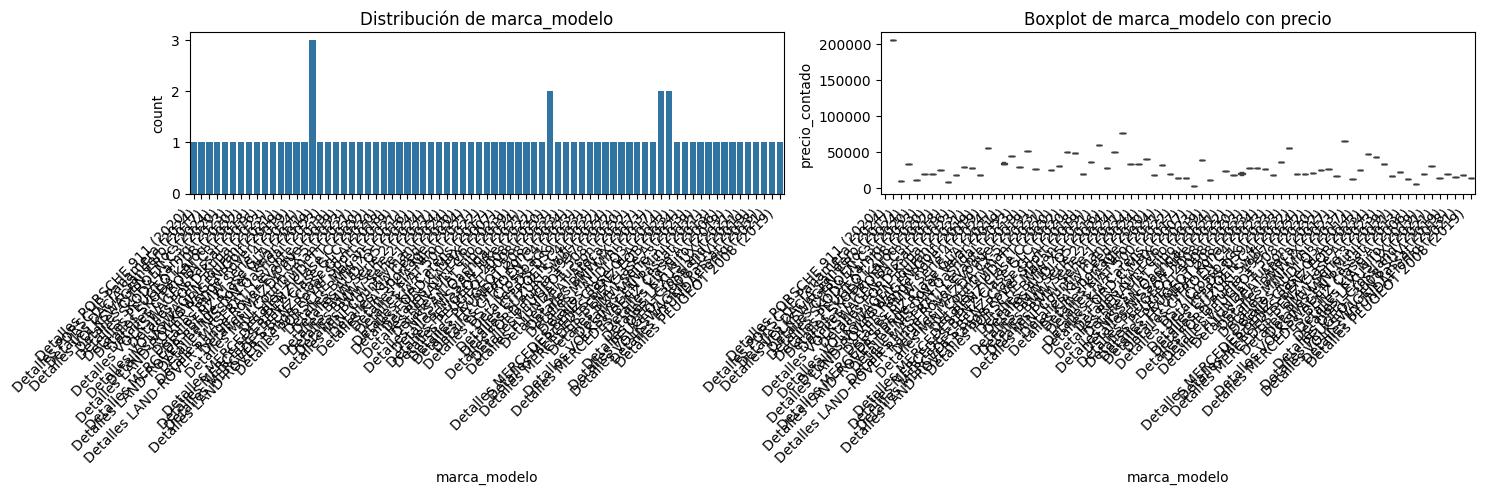

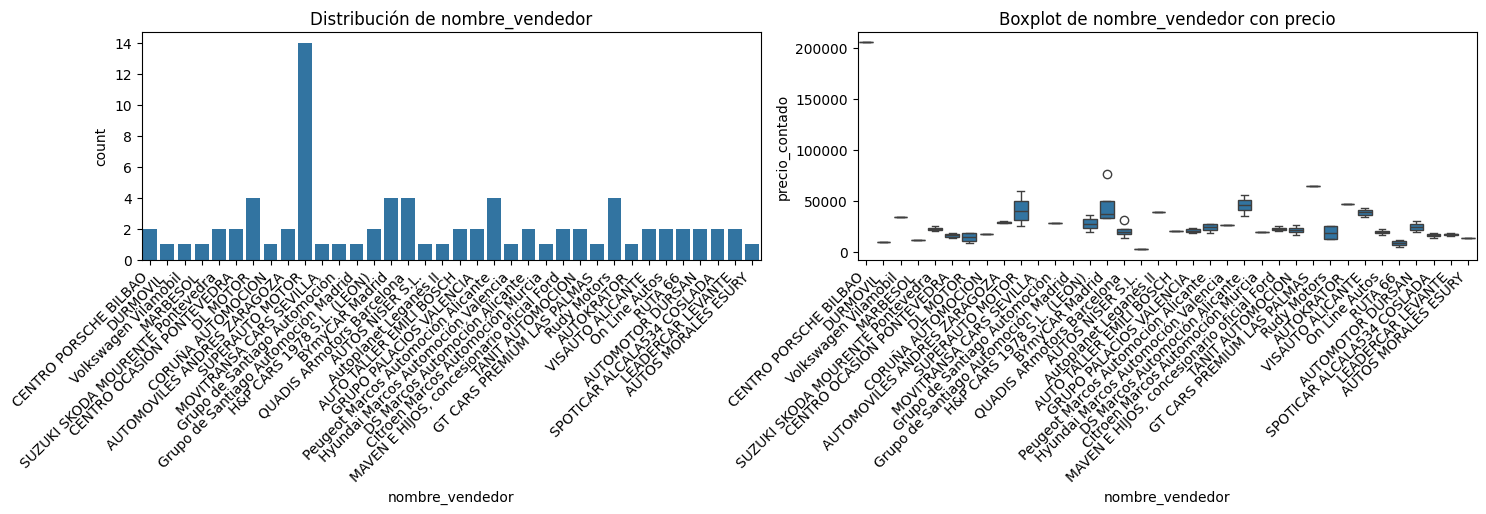

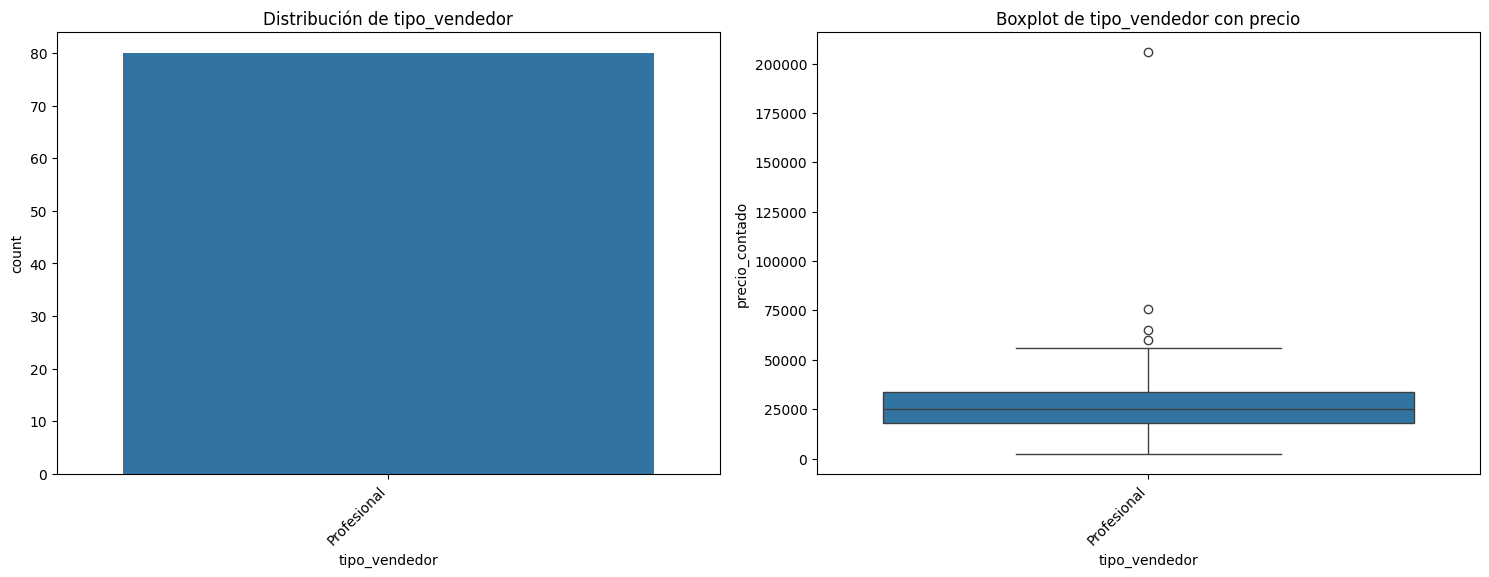

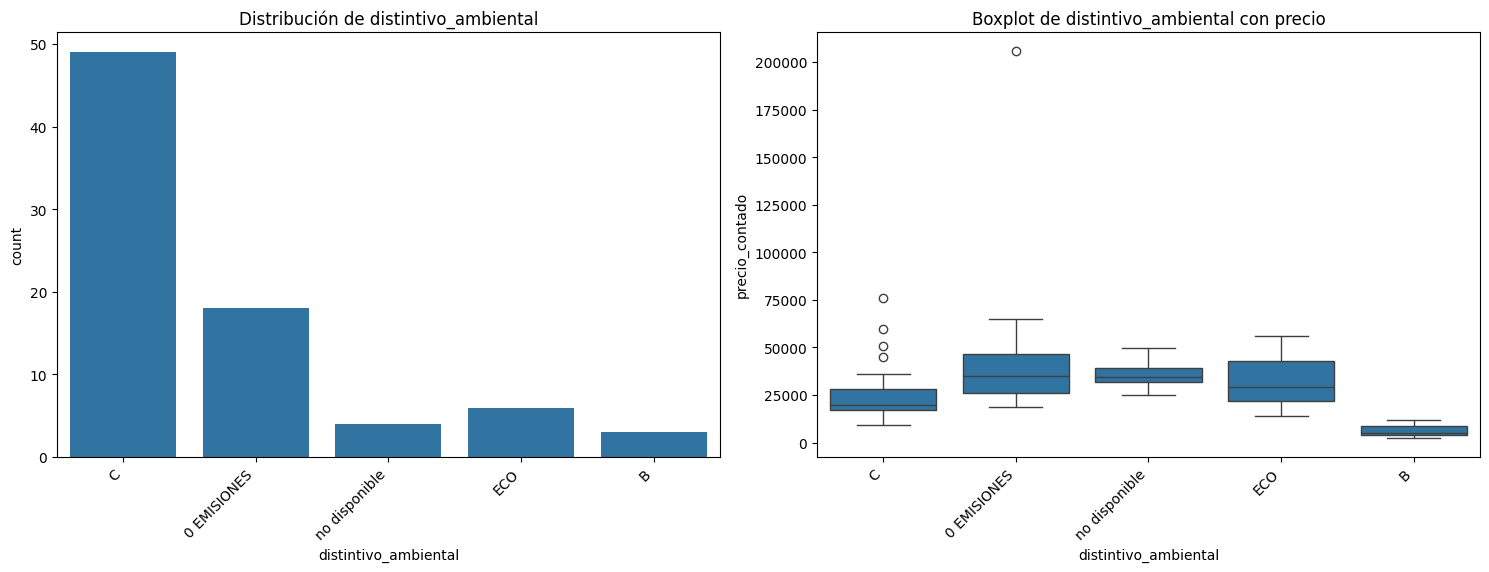

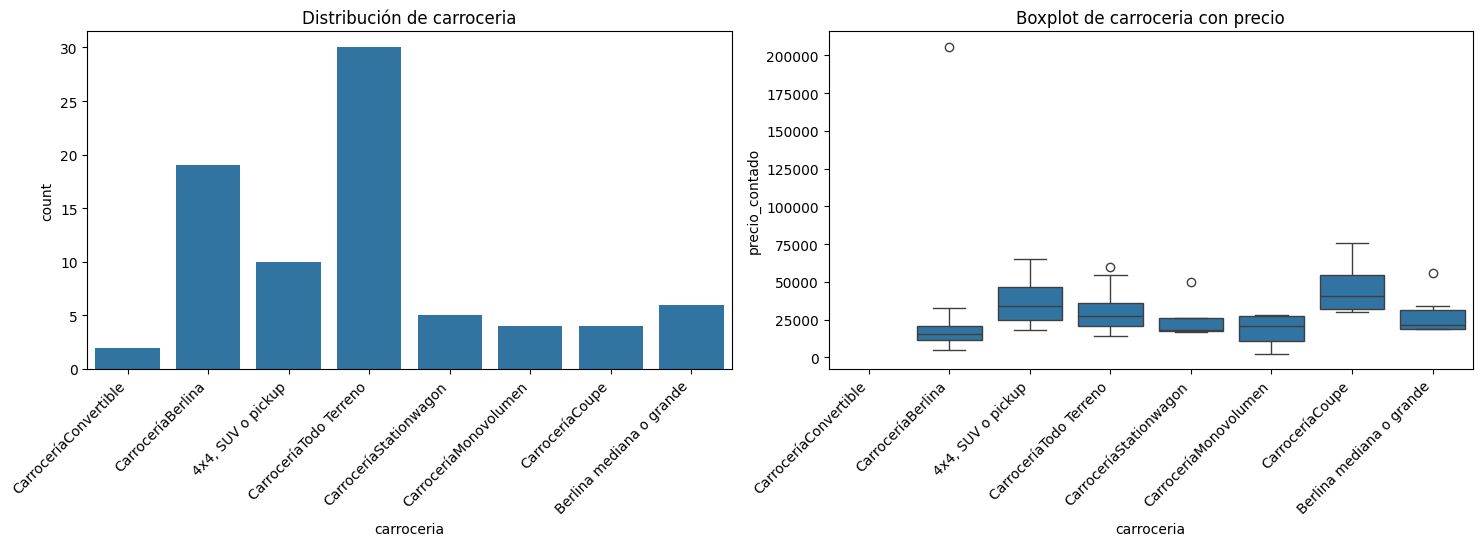

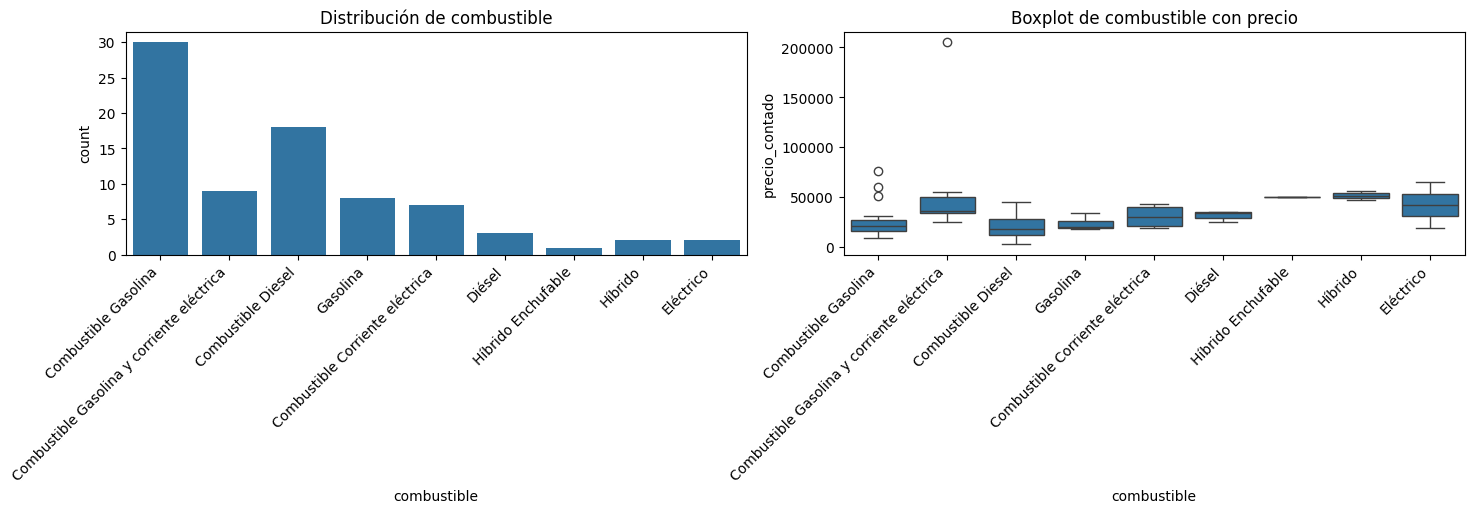

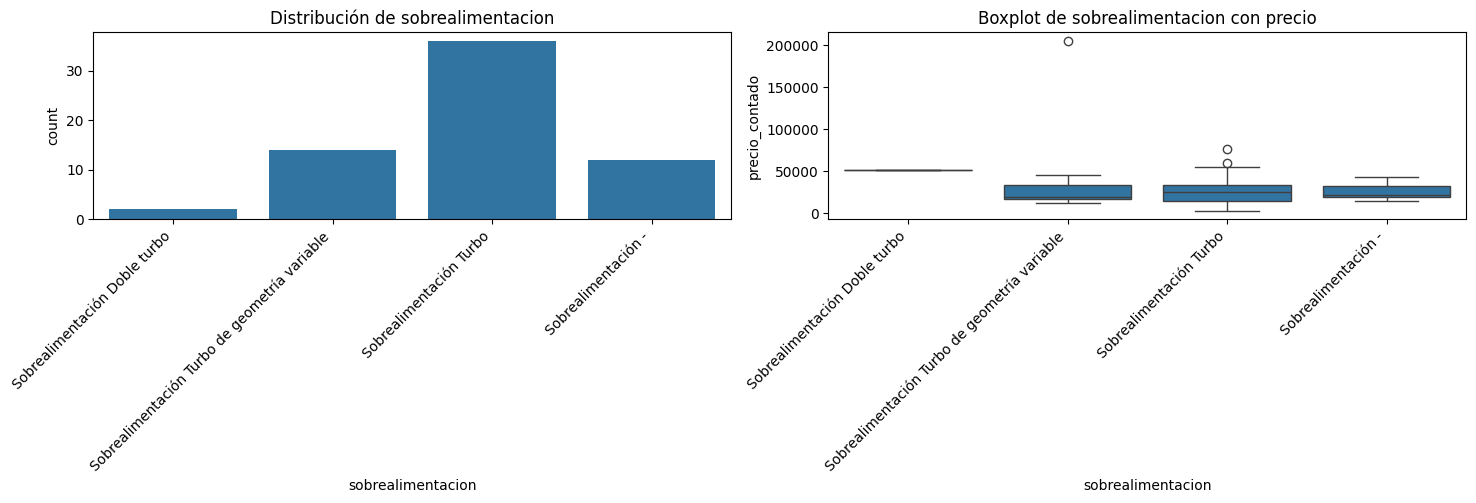

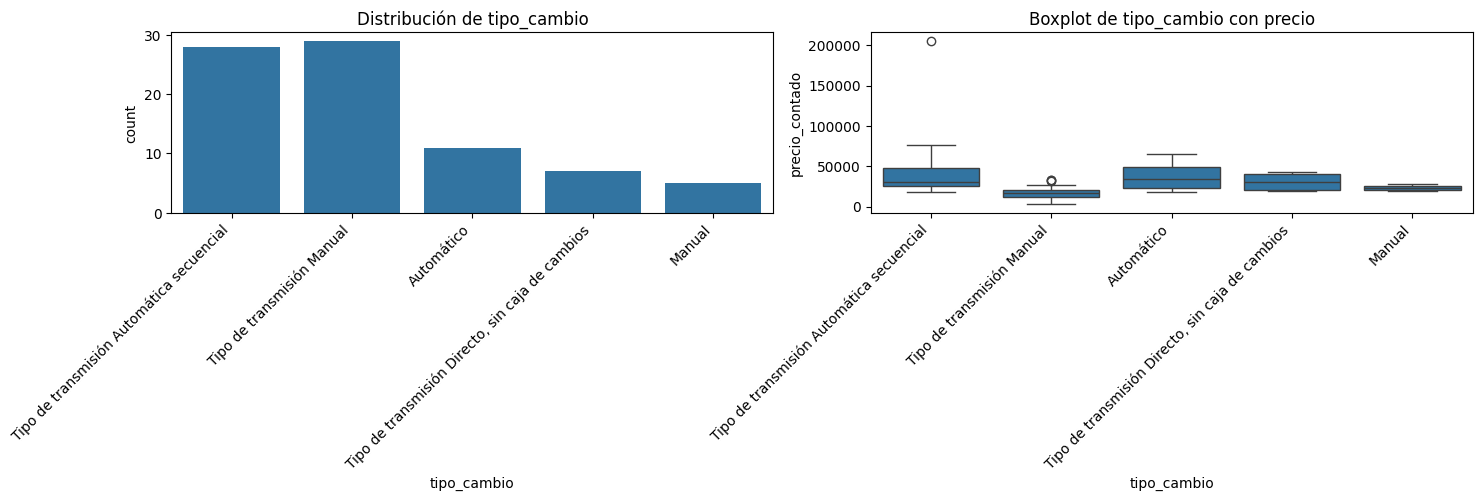

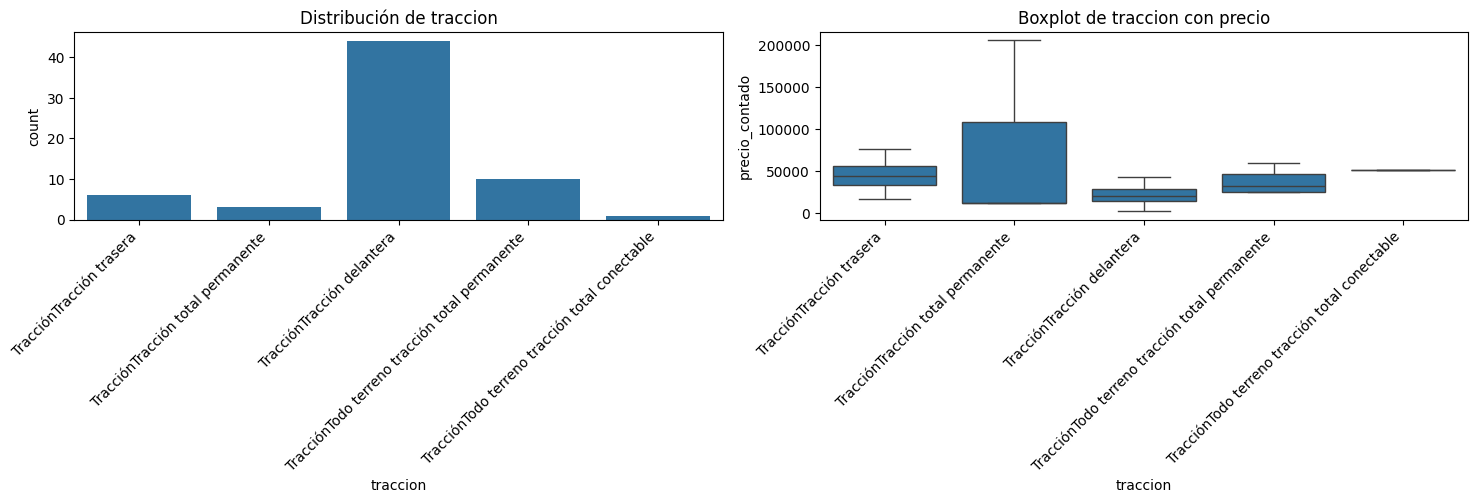

In [48]:
for columna in categorical_columns:
    metricas(df, columna)

In [49]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'CO2', 'deposito', 'cilindros', 'cilindrada', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion',
       'Fecha_mes', 'Fecha_año'],
      dtype='object')

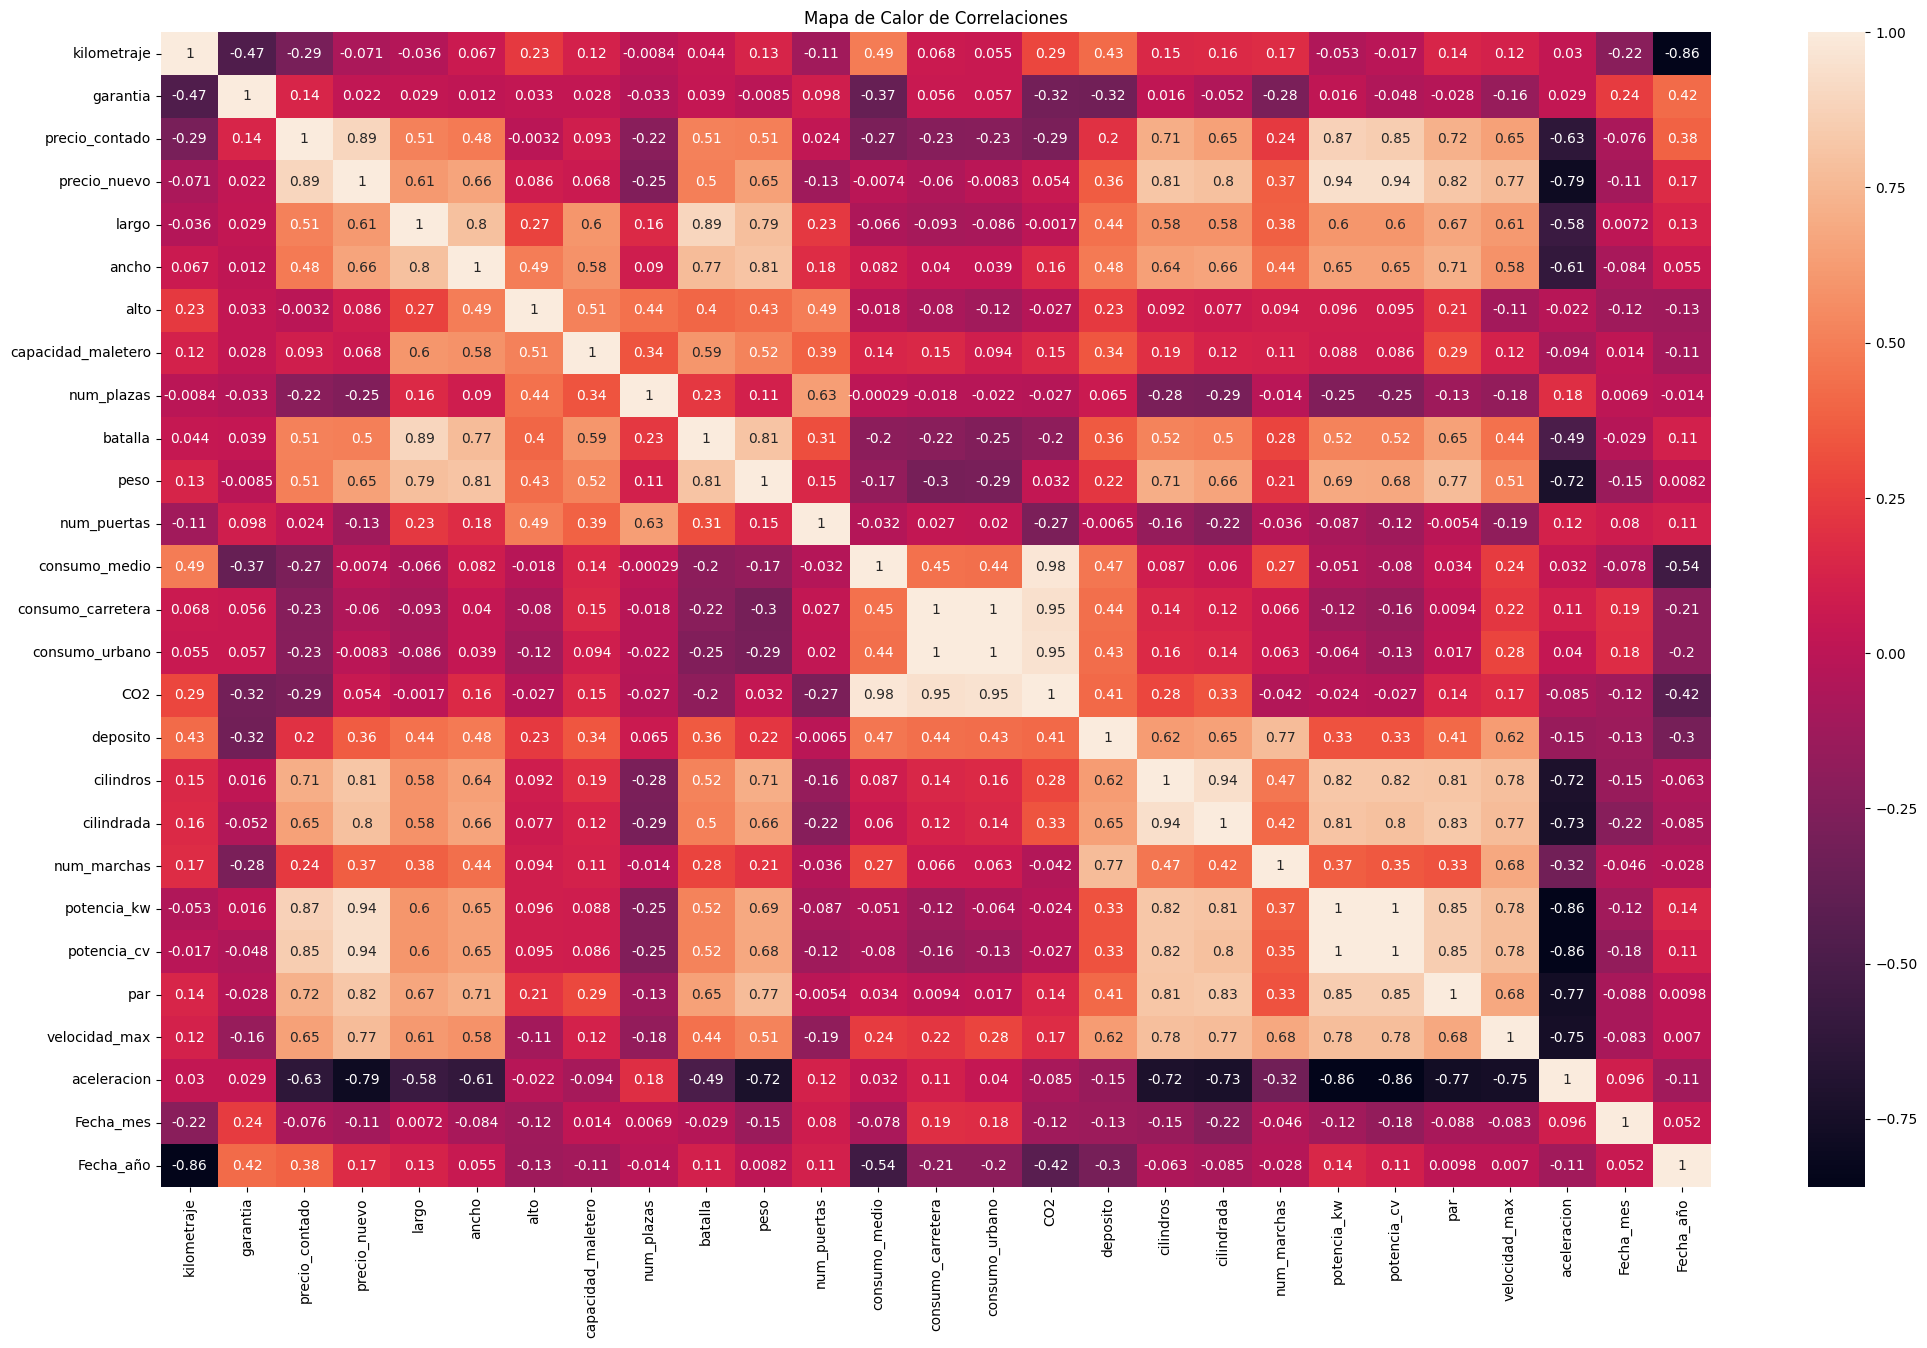

In [99]:
correlation_matrix = df[continuous_columns].corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()